In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point
from geopy.distance import geodesic

import folium
from folium.plugins import MarkerCluster, MiniMap

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### 필요한 데이터 불러오기

하남시 버스 정거장
하남시 지하철 정류장
하남시 상권 정보
하남시 
하남시 격자


In [3]:
#df_fac = pd.read_csv('./data/2-4.하남시_상권정보.csv')
df_bus = pd.read_csv('../data/2-5.하남시_버스정류장.csv')
#df_sub = pd.read_csv('./data/2-6.하남시_지하철역.csv')
df_sub = pd.read_csv('../data/타겟/하남_지하철.csv')
df_lot = pd.read_csv('./data/2-7.하남시_공영주차장.csv')
#df_use = pd.read_csv('./data/2-11.하남시_공유차량_이용현황.csv')
df_house = pd.read_csv('./data/2-12.공공주택임대_정보(하남시).csv')
df_map = gpd.read_file('data/2-14.하남시_격자.geojson')
df_target = gpd.read_file('data/3.대상구역도(하남교산).geojson')


FileNotFoundError: [Errno 2] No such file or directory: './data/2-5.하남시_버스정류장.csv'

### 각 데이터 point 값 구하기

#### 1. 하남시 버스 정류장

In [5]:
gpd.GeoDataFrame(df_bus, geometry=gpd.GeoSeries(df_bus.apply(lambda row: Point(row['lon'], row['lat']), axis=1)), crs="EPSG:4326")
df_bus

,bis_id,stn_nm,lon,lat,geometry
0,GGB227000295,위례자이더시티.플로리체위례,127.149133,37.473767,POINT (127.14913 37.47377)
1,GGB227000662,위례롯데캐슬.호반써밋에비뉴,127.151933,37.473883,POINT (127.15193 37.47388)
2,GGB227000299,플로리체위례.위례자이더시티,127.149983,37.473967,POINT (127.14998 37.47397)
3,GGB227000302,위례롯데캐슬.그린파크푸르지오.남한산성입구,127.154333,37.474383,POINT (127.15433 37.47438)
4,GGB227000535,플로리체위례.신안인스빌아스트로,127.147500,37.474667,POINT (127.14750 37.47467)
...,...,...,...,...,...
602,GGB277102396,배알미삼거리(경유),127.275450,37.525833,POINT (127.27545 37.52583)
603,GGB227000126,팔당댐.배알미,127.272150,37.526633,POINT (127.27215 37.52663)
604,GGB227000042,팔당댐.배알미,127.271350,37.526750,POINT (127.27135 37.52675)
605,GGB227000159,옛골토성앞,127.253050,37.536583,POINT (127.25305 37.53658)


#### 2. 하남시 지하철

In [6]:
gpd.GeoDataFrame(df_sub, geometry=gpd.GeoSeries(df_sub.apply(lambda row: Point(row['lon'], row['lat']), axis=1)), crs="EPSG:4326")
df_sub

,stn_nm,lon,lat,geometry
0,미사,127.192979,37.563254,POINT (127.19298 37.56325)
1,하남풍산,127.203871,37.552058,POINT (127.20387 37.55206)
2,하남시청(덕풍∙신장),127.206391,37.541922,POINT (127.20639 37.54192)
3,하남검단산,127.223444,37.539759,POINT (127.22344 37.53976)
4,신설,127.202911,37.527782,POINT (127.20291 37.52778)
5,신설,127.195059,37.510636,POINT (127.19506 37.51064)
6,신설,127.153202,37.508718,POINT (127.15320 37.50872)


#### 3. 하남시 공영 주차장

In [7]:
gpd.GeoDataFrame(df_lot, geometry=gpd.GeoSeries(df_lot.apply(lambda row: Point(row['lon'], row['lat']), axis=1)), crs="EPSG:4326")
df_lot

,carpark_nm,carpark_type,slots,lon,lat,geometry
0,하남프라자 주변,노상,63,127.208296,37.551446,POINT (127.20830 37.55145)
1,에코1단지 주변,노상,46,127.208497,37.541546,POINT (127.20850 37.54155)
2,한솔솔파크 이면도로,노상,52,127.201465,37.542955,POINT (127.20147 37.54295)
3,하남순복음교회 주변,노상,8,127.203219,37.534775,POINT (127.20322 37.53478)
4,(구)국도43번호선공영주차장,노상,73,127.213648,37.534042,POINT (127.21365 37.53404)
5,현충탑 진입로,노상,95,127.230025,37.535104,POINT (127.23002 37.53510)
6,시립테니스장 주변 공영주차장,노상,69,127.212862,37.538559,POINT (127.21286 37.53856)
7,검단산로(창우동안말),노상,16,127.233639,37.539333,POINT (127.23364 37.53933)
8,신장동 공영주차장,노외,89,127.214237,37.541376,POINT (127.21424 37.54138)
9,동일하이빌아파트 이면도로,노상,18,127.219208,37.541545,POINT (127.21921 37.54155)


#### 4. 하남시 주택 정보

In [8]:
gpd.GeoDataFrame(df_house, geometry=gpd.GeoSeries(df_house.apply(lambda row: Point(row['lon'], row['lat']), axis=1)), crs="EPSG:4326")
df_house

,blck_cd,blck_nm,type,noh,parking_slot,lon,lat,geometry
0,C00405,하남풍산1,국민임대,748,1122.0,127.200243,37.552468,POINT (127.20024 37.55247)
1,C00406,하남풍산2,국민임대,638,957.0,127.202131,37.551420,POINT (127.20213 37.55142)
2,C00407,하남풍산3,국민임대,401,601.5,127.208378,37.549259,POINT (127.20838 37.54926)
3,C00408,하남풍산4,국민임대,330,495.0,127.208184,37.547167,POINT (127.20818 37.54717)
4,C01801,미사강변도시 A12블록(분납),공공임대,38,57.0,127.188448,37.570743,POINT (127.18845 37.57074)
5,C01802,미사강변도시 A16블록(분납),공공임대,50,75.0,127.192671,37.572413,POINT (127.19267 37.57241)
6,C01921,하남미사 A13BL,영구임대,1152,1728.0,127.188696,37.568623,POINT (127.18870 37.56862)
7,C01921,하남미사 A13BL,국민임대,1590,2385.0,127.188696,37.568623,POINT (127.18870 37.56862)
8,C01967,미사강변 A29블록 10년 공임리츠,공공임대,1193,1789.5,127.198429,37.561666,POINT (127.19843 37.56167)
9,C01995,하남미사 17단지,국민임대,2180,3270.0,127.181251,37.565225,POINT (127.18125 37.56522)


#### 격자 중심점 구하기

In [9]:
df_map['grid_centroid'] = df_map['geometry'].centroid

In [10]:
df_map.rename(columns={'geometry' : 'grid_polygon'}, inplace=True)
df_map

,gid,grid_polygon,grid_centroid
0,다사710491,"POLYGON ((127.17173 37.54077, 127.17173 37.541...",POINT (127.17229 37.54122)
1,다사732511,"POLYGON ((127.19656 37.55886, 127.19656 37.559...",POINT (127.19712 37.55931)
2,다사703464,"POLYGON ((127.16392 37.51641, 127.16391 37.517...",POINT (127.16448 37.51686)
3,다사734504,"POLYGON ((127.19885 37.55256, 127.19885 37.553...",POINT (127.19941 37.55301)
4,다사731458,"POLYGON ((127.19562 37.51109, 127.19562 37.511...",POINT (127.19619 37.51154)
...,...,...,...
9629,다사755436,"POLYGON ((127.22285 37.49133, 127.22285 37.492...",POINT (127.22342 37.49178)
9630,다사766500,"POLYGON ((127.23509 37.54904, 127.23509 37.549...",POINT (127.23566 37.54949)
9631,다사744460,"POLYGON ((127.21033 37.51293, 127.21032 37.513...",POINT (127.21089 37.51338)
9632,다사771452,"POLYGON ((127.24090 37.50579, 127.24090 37.506...",POINT (127.24147 37.50624)


### 하남 교산지구에 포함된 격자 확인(by 격자 중심점으로)

In [11]:
df_target

,zoneCode,zoneName,blockName,blockType,geometry
0,41450MX2019001,하남교산 공공주택지구,경5,녹지,"POLYGON ((127.18516 37.49968, 127.18522 37.499..."
1,41450MX2019001,하남교산 공공주택지구,복4,사회복지시설,"POLYGON ((127.18821 37.50262, 127.18817 37.502..."
2,41450MX2019001,하남교산 공공주택지구,복5,사회복지시설,"POLYGON ((127.21798 37.53235, 127.21786 37.532..."
3,41450MX2019001,하남교산 공공주택지구,복6,사회복지시설,"POLYGON ((127.20431 37.52177, 127.20434 37.521..."
4,41450MX2019001,하남교산 공공주택지구,복8,사회복지시설,"POLYGON ((127.19803 37.51356, 127.19782 37.513..."
...,...,...,...,...,...
736,41450MX2019001,하남교산 공공주택지구,근생3-2,근린생활시설용지,"POLYGON ((127.20631 37.52285, 127.20619 37.522..."
737,41450MX2019001,하남교산 공공주택지구,근생3-3,근린생활시설용지,"POLYGON ((127.20440 37.52106, 127.20430 37.521..."
738,41450MX2019001,하남교산 공공주택지구,근생3-5,근린생활시설용지,"POLYGON ((127.20380 37.52007, 127.20373 37.520..."
739,41450MX2019001,하남교산 공공주택지구,체1,체육시설,"POLYGON ((127.19703 37.52797, 127.19803 37.527..."


In [12]:
df_target.rename(columns={'geometry' : 'target_polygon'}, inplace=True)
df_target

,zoneCode,zoneName,blockName,blockType,target_polygon
0,41450MX2019001,하남교산 공공주택지구,경5,녹지,"POLYGON ((127.18516 37.49968, 127.18522 37.499..."
1,41450MX2019001,하남교산 공공주택지구,복4,사회복지시설,"POLYGON ((127.18821 37.50262, 127.18817 37.502..."
2,41450MX2019001,하남교산 공공주택지구,복5,사회복지시설,"POLYGON ((127.21798 37.53235, 127.21786 37.532..."
3,41450MX2019001,하남교산 공공주택지구,복6,사회복지시설,"POLYGON ((127.20431 37.52177, 127.20434 37.521..."
4,41450MX2019001,하남교산 공공주택지구,복8,사회복지시설,"POLYGON ((127.19803 37.51356, 127.19782 37.513..."
...,...,...,...,...,...
736,41450MX2019001,하남교산 공공주택지구,근생3-2,근린생활시설용지,"POLYGON ((127.20631 37.52285, 127.20619 37.522..."
737,41450MX2019001,하남교산 공공주택지구,근생3-3,근린생활시설용지,"POLYGON ((127.20440 37.52106, 127.20430 37.521..."
738,41450MX2019001,하남교산 공공주택지구,근생3-5,근린생활시설용지,"POLYGON ((127.20380 37.52007, 127.20373 37.520..."
739,41450MX2019001,하남교산 공공주택지구,체1,체육시설,"POLYGON ((127.19703 37.52797, 127.19803 37.527..."


In [13]:
df_target['blockType'].unique()

array(['녹지', '사회복지시설', '보행자전용도로', '공원', '문화시설기타', '배수시설', '교육시설',
       '복합시설용지기타', '광장', '공공공지', '자족기능확보시설', '단독주택', '공동주택', '주차장',
       '상업시설', '근린생활시설용지', '오수중계펌프장', '종교시설용지', '하천', '수도공급시설', '도로',
       '유수지', '종합의료시설', '연립', '농업관련시설', '주유소용지', '주상복합', '업무시설', '공공청사',
       '전기공급설비', '도서관', '열공급설비', '문화시설', '가압장', '체육시설'], dtype=object)

In [14]:
# 포인트 데이터 준비
# geometry 열이 이미 준비되어 있으므로 바로 GeoDataFrame으로 변환
gdf_points = gpd.GeoDataFrame(df_map, geometry=df_map['grid_centroid'], crs="EPSG:4326")

# 격자 데이터 (df_map)도 GeoDataFrame 형식이어야 함
# 격자 데이터의 'geometry' 열이 다각형(Polygon) 형태여야 합니다.
gdf_grid = gpd.GeoDataFrame(df_target, geometry=df_target['target_polygon'], crs="EPSG:4326")

In [15]:
# 공간 조인 실행: 포인트가 격자 내에 포함되는 경우 조인
result_grid = gpd.sjoin(gdf_points, gdf_grid, how="inner", op="within").reset_index()
result_grid = result_grid.drop(['index_right', 'geometry', 'index'], axis=1)
result_grid

,gid,grid_polygon,grid_centroid,zoneCode,zoneName,blockName,blockType,target_polygon
0,다사731458,"POLYGON ((127.19562 37.51109, 127.19562 37.511...",POINT (127.19619 37.51154),41450MX2019001,하남교산 공공주택지구,완4,녹지,"POLYGON ((127.19601 37.51097, 127.19596 37.510..."
1,다사731459,"POLYGON ((127.19562 37.51199, 127.19562 37.512...",POINT (127.19618 37.51244),41450MX2019001,하남교산 공공주택지구,완4,녹지,"POLYGON ((127.19601 37.51097, 127.19596 37.510..."
2,다사725438,"POLYGON ((127.18891 37.49304, 127.18890 37.493...",POINT (127.18947 37.49350),41450MX2019001,하남교산 공공주택지구,수1,공원,"POLYGON ((127.18979 37.49317, 127.18979 37.493..."
3,다사730463,"POLYGON ((127.19447 37.51559, 127.19447 37.516...",POINT (127.19504 37.51604),41450MX2019001,하남교산 공공주택지구,A-11,공동주택,"POLYGON ((127.19541 37.51630, 127.19538 37.516..."
4,다사729463,"POLYGON ((127.19334 37.51559, 127.19334 37.516...",POINT (127.19391 37.51604),41450MX2019001,하남교산 공공주택지구,A-11,공동주택,"POLYGON ((127.19541 37.51630, 127.19538 37.516..."
...,...,...,...,...,...,...,...,...
624,다사727444,"POLYGON ((127.19115 37.49846, 127.19114 37.499...",POINT (127.19171 37.49891),41450MX2019001,하남교산 공공주택지구,수1,공원,"POLYGON ((127.19122 37.49832, 127.19110 37.498..."
625,다사728458,"POLYGON ((127.19223 37.51108, 127.19222 37.511...",POINT (127.19279 37.51153),41450MX2019001,하남교산 공공주택지구,배1,배수시설,"POLYGON ((127.19291 37.51170, 127.19298 37.511..."
626,다사742477,"POLYGON ((127.20800 37.52825, 127.20800 37.529...",POINT (127.20857 37.52870),41450MX2019001,하남교산 공공주택지구,중복5,복합시설용지기타,"POLYGON ((127.20872 37.52944, 127.20885 37.529..."
627,다사727441,"POLYGON ((127.19116 37.49575, 127.19116 37.496...",POINT (127.19172 37.49621),41450MX2019001,하남교산 공공주택지구,소10,공원,"POLYGON ((127.19191 37.49651, 127.19220 37.496..."


#### 1) 버스

In [16]:
# 포인트 데이터 준비
# geometry 열이 이미 준비되어 있으므로 바로 GeoDataFrame으로 변환
gdf_points = gpd.GeoDataFrame(df_bus, geometry=df_bus['geometry'], crs="EPSG:4326")

# 격자 데이터 (df_map)도 GeoDataFrame 형식이어야 함
# 격자 데이터의 'geometry' 열이 다각형(Polygon) 형태여야 합니다.
gdf_grid = gpd.GeoDataFrame(result_grid, geometry=result_grid['grid_polygon'], crs="EPSG:4326")

In [17]:
# 공간 조인 실행: 포인트가 격자 내에 포함되는 경우 조인
result_bus = gpd.sjoin(gdf_points, gdf_grid, how="inner", op="within")
result_bus

,bis_id,stn_nm,lon,lat,geometry,index_right,gid,grid_polygon,grid_centroid,zoneCode,zoneName,blockName,blockType,target_polygon
16,GGB227000505,가운데말,127.204750,37.522217,POINT (127.20475 37.52222),123,다사739470,"POLYGON ((127.20463 37.52193, 127.20463 37.522...",POINT (127.20520 37.52238),41450MX2019001,하남교산 공공주택지구,수도1,수도공급시설,"POLYGON ((127.20526 37.52241, 127.20513 37.522..."
17,GGB227000671,가운데말,127.204633,37.522317,POINT (127.20463 37.52232),123,다사739470,"POLYGON ((127.20463 37.52193, 127.20463 37.522...",POINT (127.20520 37.52238),41450MX2019001,하남교산 공공주택지구,수도1,수도공급시설,"POLYGON ((127.20526 37.52241, 127.20513 37.522..."
18,GGB227000504,안샘재,127.207517,37.522533,POINT (127.20752 37.52253),428,다사741470,"POLYGON ((127.20690 37.52193, 127.20689 37.522...",POINT (127.20746 37.52239),41450MX2019001,하남교산 공공주택지구,수도1,수도공급시설,"POLYGON ((127.20903 37.52247, 127.20903 37.522..."
19,GGB227000503,안샘재,127.207533,37.522750,POINT (127.20753 37.52275),428,다사741470,"POLYGON ((127.20690 37.52193, 127.20689 37.522...",POINT (127.20746 37.52239),41450MX2019001,하남교산 공공주택지구,수도1,수도공급시설,"POLYGON ((127.20903 37.52247, 127.20903 37.522..."
20,GGB227000501,안샘재,127.207983,37.524633,POINT (127.20798 37.52463),436,다사741472,"POLYGON ((127.20689 37.52374, 127.20688 37.524...",POINT (127.20745 37.52419),41450MX2019001,하남교산 공공주택지구,A-7,공동주택,"POLYGON ((127.20894 37.52430, 127.20896 37.524..."
49,GGB227000494,골말,127.203217,37.509167,POINT (127.20322 37.50917),23,다사737455,"POLYGON ((127.20242 37.50840, 127.20242 37.509...",POINT (127.20299 37.50885),41450MX2019001,하남교산 공공주택지구,천6,하천,"POLYGON ((127.20319 37.50888, 127.20312 37.508..."
50,GGB227000589,내미길,127.196283,37.511467,POINT (127.19628 37.51147),0,다사731458,"POLYGON ((127.19562 37.51109, 127.19562 37.511...",POINT (127.19619 37.51154),41450MX2019001,하남교산 공공주택지구,완4,녹지,"POLYGON ((127.19601 37.51097, 127.19596 37.510..."
51,GGB227000590,내미길,127.196200,37.511617,POINT (127.19620 37.51162),0,다사731458,"POLYGON ((127.19562 37.51109, 127.19562 37.511...",POINT (127.19619 37.51154),41450MX2019001,하남교산 공공주택지구,완4,녹지,"POLYGON ((127.19601 37.51097, 127.19596 37.510..."
52,GGB227000511,긴담길삼거리,127.201600,37.511933,POINT (127.20160 37.51193),221,다사736458,"POLYGON ((127.20128 37.51110, 127.20128 37.512...",POINT (127.20184 37.51155),41450MX2019001,하남교산 공공주택지구,역4,공원,"POLYGON ((127.20100 37.51341, 127.20101 37.513..."
53,GGB227000512,긴담길삼거리,127.201650,37.511950,POINT (127.20165 37.51195),221,다사736458,"POLYGON ((127.20128 37.51110, 127.20128 37.512...",POINT (127.20184 37.51155),41450MX2019001,하남교산 공공주택지구,역4,공원,"POLYGON ((127.20100 37.51341, 127.20101 37.513..."


In [18]:
len(result_bus)

53

In [19]:
# 각 그리드별 행 개수 계산
result_bus_1 = result_bus.groupby('gid').size()

# 결과 출력
result_bus_1 = pd.DataFrame(result_bus_1).reset_index()
result_bus_1.rename(columns={0 : 'bus_cnt'}, inplace=True)
result_bus_1

,gid,bus_cnt
0,다사726438,1
1,다사726442,1
2,다사726446,1
3,다사726447,1
4,다사727450,2
5,다사728453,1
6,다사729452,1
7,다사730455,2
8,다사730470,2
9,다사731458,2


#### 2) 지하철

In [20]:
# 포인트 데이터 준비
# geometry 열이 이미 준비되어 있으므로 바로 GeoDataFrame으로 변환
gdf_points = gpd.GeoDataFrame(df_sub, geometry=df_sub['geometry'], crs="EPSG:4326")

# 격자 데이터 (df_map)도 GeoDataFrame 형식이어야 함
# 격자 데이터의 'geometry' 열이 다각형(Polygon) 형태여야 합니다.
gdf_grid = gpd.GeoDataFrame(result_grid, geometry=result_grid['grid_polygon'], crs="EPSG:4326")

In [21]:
# 공간 조인 실행: 포인트가 격자 내에 포함되는 경우 조인
result_sub = gpd.sjoin(gdf_points, gdf_grid, how="inner", op="within")
result_sub

,stn_nm,lon,lat,geometry,index_right,gid,grid_polygon,grid_centroid,zoneCode,zoneName,blockName,blockType,target_polygon
4,신설,127.202911,37.527782,POINT (127.20291 37.52778),235,다사737476,"POLYGON ((127.20235 37.52733, 127.20234 37.528...",POINT (127.20291 37.52778),41450MX2019001,하남교산 공공주택지구,중복7,복합시설용지기타,"POLYGON ((127.20419 37.52759, 127.20424 37.526..."
5,신설,127.195059,37.510636,POINT (127.19506 37.51064),437,다사730457,"POLYGON ((127.19449 37.51018, 127.19449 37.511...",POINT (127.19506 37.51064),41450MX2019001,하남교산 공공주택지구,고2,교육시설,"POLYGON ((127.19608 37.51145, 127.19607 37.511..."


In [22]:
# 각 그리드별 행 개수 계산
result_sub_1 = result_sub.groupby('gid').size()

# 결과 출력
result_sub_1 = pd.DataFrame(result_sub_1).reset_index()
result_sub_1.rename(columns={0 : 'sub_cnt'}, inplace=True)
result_sub_1

,gid,sub_cnt
0,다사730457,1
1,다사737476,1


#### 그리드 중심점의 위경도 추출

In [23]:
# 경도와 위도 추출
result_grid["grid_center_lon"] = result_grid["grid_centroid"].x
result_grid["grid_center_lat"] = result_grid["grid_centroid"].y

# 결과 출력
result_grid

,gid,grid_polygon,grid_centroid,zoneCode,zoneName,blockName,blockType,target_polygon,geometry,grid_center_lon,grid_center_lat
0,다사731458,"POLYGON ((127.19562 37.51109, 127.19562 37.511...",POINT (127.19619 37.51154),41450MX2019001,하남교산 공공주택지구,완4,녹지,"POLYGON ((127.19601 37.51097, 127.19596 37.510...","POLYGON ((127.19562 37.51109, 127.19562 37.511...",127.196186,37.511540
1,다사731459,"POLYGON ((127.19562 37.51199, 127.19562 37.512...",POINT (127.19618 37.51244),41450MX2019001,하남교산 공공주택지구,완4,녹지,"POLYGON ((127.19601 37.51097, 127.19596 37.510...","POLYGON ((127.19562 37.51199, 127.19562 37.512...",127.196183,37.512442
2,다사725438,"POLYGON ((127.18891 37.49304, 127.18890 37.493...",POINT (127.18947 37.49350),41450MX2019001,하남교산 공공주택지구,수1,공원,"POLYGON ((127.18979 37.49317, 127.18979 37.493...","POLYGON ((127.18891 37.49304, 127.18890 37.493...",127.189472,37.493496
3,다사730463,"POLYGON ((127.19447 37.51559, 127.19447 37.516...",POINT (127.19504 37.51604),41450MX2019001,하남교산 공공주택지구,A-11,공동주택,"POLYGON ((127.19541 37.51630, 127.19538 37.516...","POLYGON ((127.19447 37.51559, 127.19447 37.516...",127.195037,37.516044
4,다사729463,"POLYGON ((127.19334 37.51559, 127.19334 37.516...",POINT (127.19391 37.51604),41450MX2019001,하남교산 공공주택지구,A-11,공동주택,"POLYGON ((127.19541 37.51630, 127.19538 37.516...","POLYGON ((127.19334 37.51559, 127.19334 37.516...",127.193905,37.516041
...,...,...,...,...,...,...,...,...,...,...,...
624,다사727444,"POLYGON ((127.19115 37.49846, 127.19114 37.499...",POINT (127.19171 37.49891),41450MX2019001,하남교산 공공주택지구,수1,공원,"POLYGON ((127.19122 37.49832, 127.19110 37.498...","POLYGON ((127.19115 37.49846, 127.19114 37.499...",127.191712,37.498910
625,다사728458,"POLYGON ((127.19223 37.51108, 127.19222 37.511...",POINT (127.19279 37.51153),41450MX2019001,하남교산 공공주택지구,배1,배수시설,"POLYGON ((127.19291 37.51170, 127.19298 37.511...","POLYGON ((127.19223 37.51108, 127.19222 37.511...",127.192792,37.511532
626,다사742477,"POLYGON ((127.20800 37.52825, 127.20800 37.529...",POINT (127.20857 37.52870),41450MX2019001,하남교산 공공주택지구,중복5,복합시설용지기타,"POLYGON ((127.20872 37.52944, 127.20885 37.529...","POLYGON ((127.20800 37.52825, 127.20800 37.529...",127.208566,37.528698
627,다사727441,"POLYGON ((127.19116 37.49575, 127.19116 37.496...",POINT (127.19172 37.49621),41450MX2019001,하남교산 공공주택지구,소10,공원,"POLYGON ((127.19191 37.49651, 127.19220 37.496...","POLYGON ((127.19116 37.49575, 127.19116 37.496...",127.191723,37.496206


#### 3) 주택 위치

In [24]:
df_house

,blck_cd,blck_nm,type,noh,parking_slot,lon,lat,geometry
0,C00405,하남풍산1,국민임대,748,1122.0,127.200243,37.552468,POINT (127.20024 37.55247)
1,C00406,하남풍산2,국민임대,638,957.0,127.202131,37.551420,POINT (127.20213 37.55142)
2,C00407,하남풍산3,국민임대,401,601.5,127.208378,37.549259,POINT (127.20838 37.54926)
3,C00408,하남풍산4,국민임대,330,495.0,127.208184,37.547167,POINT (127.20818 37.54717)
4,C01801,미사강변도시 A12블록(분납),공공임대,38,57.0,127.188448,37.570743,POINT (127.18845 37.57074)
5,C01802,미사강변도시 A16블록(분납),공공임대,50,75.0,127.192671,37.572413,POINT (127.19267 37.57241)
6,C01921,하남미사 A13BL,영구임대,1152,1728.0,127.188696,37.568623,POINT (127.18870 37.56862)
7,C01921,하남미사 A13BL,국민임대,1590,2385.0,127.188696,37.568623,POINT (127.18870 37.56862)
8,C01967,미사강변 A29블록 10년 공임리츠,공공임대,1193,1789.5,127.198429,37.561666,POINT (127.19843 37.56167)
9,C01995,하남미사 17단지,국민임대,2180,3270.0,127.181251,37.565225,POINT (127.18125 37.56522)


In [25]:
# 포인트 데이터 준비
# geometry 열이 이미 준비되어 있으므로 바로 GeoDataFrame으로 변환
gdf_points = gpd.GeoDataFrame(df_house, geometry=df_house['geometry'], crs="EPSG:4326")

# 격자 데이터 (df_map)도 GeoDataFrame 형식이어야 함
# 격자 데이터의 'geometry' 열이 다각형(Polygon) 형태여야 합니다.
gdf_grid = gpd.GeoDataFrame(result_grid, geometry=result_grid['grid_polygon'], crs="EPSG:4326")

In [26]:
# 공간 조인 실행: 포인트가 격자 내에 포함되는 경우 조인
result_house = gpd.sjoin(gdf_points, gdf_grid, how="inner", op="within")
result_house

,blck_cd,blck_nm,type,noh,parking_slot,lon,lat,geometry,index_right,gid,grid_polygon,grid_centroid,zoneCode,zoneName,blockName,blockType,target_polygon,grid_center_lon,grid_center_lat


##### 주택 없음.

#### 4) 공영 주차장

In [27]:
# 포인트 데이터 준비
# geometry 열이 이미 준비되어 있으므로 바로 GeoDataFrame으로 변환
gdf_points = gpd.GeoDataFrame(df_lot, geometry=df_lot['geometry'], crs="EPSG:4326")

# 격자 데이터 (df_map)도 GeoDataFrame 형식이어야 함
# 격자 데이터의 'geometry' 열이 다각형(Polygon) 형태여야 합니다.
gdf_grid = gpd.GeoDataFrame(result_grid, geometry=result_grid['grid_polygon'], crs="EPSG:4326")

In [28]:
# 공간 조인 실행: 포인트가 격자 내에 포함되는 경우 조인
result_lot = gpd.sjoin(gdf_points, gdf_grid, how="inner", op="within")
result_lot

,carpark_nm,carpark_type,slots,lon,lat,geometry,index_right,gid,grid_polygon,grid_centroid,zoneCode,zoneName,blockName,blockType,target_polygon,grid_center_lon,grid_center_lat
4,(구)국도43번호선공영주차장,노상,73,127.213648,37.534042,POINT (127.21365 37.53404),515,다사747483,"POLYGON ((127.21364 37.53367, 127.21364 37.534...",POINT (127.21420 37.53412),41450MX2019001,하남교산 공공주택지구,주복1,주상복합,"POLYGON ((127.21473 37.53504, 127.21494 37.534...",127.214205,37.534119
11,남한산성등산로,노외,75,127.190002,37.496144,POINT (127.19000 37.49614),583,다사725441,"POLYGON ((127.18890 37.49575, 127.18889 37.496...",POINT (127.18946 37.49620),41450MX2019001,하남교산 공공주택지구,경7,녹지,"POLYGON ((127.19051 37.49755, 127.19056 37.497...",127.189461,37.496200


In [29]:
# 각 그리드별 행 개수 계산
result_lot_1 = result_lot.groupby('gid').size()

# 결과 출력
result_lot_1 = pd.DataFrame(result_lot_1).reset_index()
result_lot_1.rename(columns={0 : 'lot_cnt'}, inplace=True)
result_lot_1

,gid,lot_cnt
0,다사725441,1
1,다사747483,1


In [30]:
result_grid

,gid,grid_polygon,grid_centroid,zoneCode,zoneName,blockName,blockType,target_polygon,geometry,grid_center_lon,grid_center_lat
0,다사731458,"POLYGON ((127.19562 37.51109, 127.19562 37.511...",POINT (127.19619 37.51154),41450MX2019001,하남교산 공공주택지구,완4,녹지,"POLYGON ((127.19601 37.51097, 127.19596 37.510...","POLYGON ((127.19562 37.51109, 127.19562 37.511...",127.196186,37.511540
1,다사731459,"POLYGON ((127.19562 37.51199, 127.19562 37.512...",POINT (127.19618 37.51244),41450MX2019001,하남교산 공공주택지구,완4,녹지,"POLYGON ((127.19601 37.51097, 127.19596 37.510...","POLYGON ((127.19562 37.51199, 127.19562 37.512...",127.196183,37.512442
2,다사725438,"POLYGON ((127.18891 37.49304, 127.18890 37.493...",POINT (127.18947 37.49350),41450MX2019001,하남교산 공공주택지구,수1,공원,"POLYGON ((127.18979 37.49317, 127.18979 37.493...","POLYGON ((127.18891 37.49304, 127.18890 37.493...",127.189472,37.493496
3,다사730463,"POLYGON ((127.19447 37.51559, 127.19447 37.516...",POINT (127.19504 37.51604),41450MX2019001,하남교산 공공주택지구,A-11,공동주택,"POLYGON ((127.19541 37.51630, 127.19538 37.516...","POLYGON ((127.19447 37.51559, 127.19447 37.516...",127.195037,37.516044
4,다사729463,"POLYGON ((127.19334 37.51559, 127.19334 37.516...",POINT (127.19391 37.51604),41450MX2019001,하남교산 공공주택지구,A-11,공동주택,"POLYGON ((127.19541 37.51630, 127.19538 37.516...","POLYGON ((127.19334 37.51559, 127.19334 37.516...",127.193905,37.516041
...,...,...,...,...,...,...,...,...,...,...,...
624,다사727444,"POLYGON ((127.19115 37.49846, 127.19114 37.499...",POINT (127.19171 37.49891),41450MX2019001,하남교산 공공주택지구,수1,공원,"POLYGON ((127.19122 37.49832, 127.19110 37.498...","POLYGON ((127.19115 37.49846, 127.19114 37.499...",127.191712,37.498910
625,다사728458,"POLYGON ((127.19223 37.51108, 127.19222 37.511...",POINT (127.19279 37.51153),41450MX2019001,하남교산 공공주택지구,배1,배수시설,"POLYGON ((127.19291 37.51170, 127.19298 37.511...","POLYGON ((127.19223 37.51108, 127.19222 37.511...",127.192792,37.511532
626,다사742477,"POLYGON ((127.20800 37.52825, 127.20800 37.529...",POINT (127.20857 37.52870),41450MX2019001,하남교산 공공주택지구,중복5,복합시설용지기타,"POLYGON ((127.20872 37.52944, 127.20885 37.529...","POLYGON ((127.20800 37.52825, 127.20800 37.529...",127.208566,37.528698
627,다사727441,"POLYGON ((127.19116 37.49575, 127.19116 37.496...",POINT (127.19172 37.49621),41450MX2019001,하남교산 공공주택지구,소10,공원,"POLYGON ((127.19191 37.49651, 127.19220 37.496...","POLYGON ((127.19116 37.49575, 127.19116 37.496...",127.191723,37.496206


In [31]:
result_bus

,bis_id,stn_nm,lon,lat,geometry,index_right,gid,grid_polygon,grid_centroid,zoneCode,zoneName,blockName,blockType,target_polygon
16,GGB227000505,가운데말,127.204750,37.522217,POINT (127.20475 37.52222),123,다사739470,"POLYGON ((127.20463 37.52193, 127.20463 37.522...",POINT (127.20520 37.52238),41450MX2019001,하남교산 공공주택지구,수도1,수도공급시설,"POLYGON ((127.20526 37.52241, 127.20513 37.522..."
17,GGB227000671,가운데말,127.204633,37.522317,POINT (127.20463 37.52232),123,다사739470,"POLYGON ((127.20463 37.52193, 127.20463 37.522...",POINT (127.20520 37.52238),41450MX2019001,하남교산 공공주택지구,수도1,수도공급시설,"POLYGON ((127.20526 37.52241, 127.20513 37.522..."
18,GGB227000504,안샘재,127.207517,37.522533,POINT (127.20752 37.52253),428,다사741470,"POLYGON ((127.20690 37.52193, 127.20689 37.522...",POINT (127.20746 37.52239),41450MX2019001,하남교산 공공주택지구,수도1,수도공급시설,"POLYGON ((127.20903 37.52247, 127.20903 37.522..."
19,GGB227000503,안샘재,127.207533,37.522750,POINT (127.20753 37.52275),428,다사741470,"POLYGON ((127.20690 37.52193, 127.20689 37.522...",POINT (127.20746 37.52239),41450MX2019001,하남교산 공공주택지구,수도1,수도공급시설,"POLYGON ((127.20903 37.52247, 127.20903 37.522..."
20,GGB227000501,안샘재,127.207983,37.524633,POINT (127.20798 37.52463),436,다사741472,"POLYGON ((127.20689 37.52374, 127.20688 37.524...",POINT (127.20745 37.52419),41450MX2019001,하남교산 공공주택지구,A-7,공동주택,"POLYGON ((127.20894 37.52430, 127.20896 37.524..."
49,GGB227000494,골말,127.203217,37.509167,POINT (127.20322 37.50917),23,다사737455,"POLYGON ((127.20242 37.50840, 127.20242 37.509...",POINT (127.20299 37.50885),41450MX2019001,하남교산 공공주택지구,천6,하천,"POLYGON ((127.20319 37.50888, 127.20312 37.508..."
50,GGB227000589,내미길,127.196283,37.511467,POINT (127.19628 37.51147),0,다사731458,"POLYGON ((127.19562 37.51109, 127.19562 37.511...",POINT (127.19619 37.51154),41450MX2019001,하남교산 공공주택지구,완4,녹지,"POLYGON ((127.19601 37.51097, 127.19596 37.510..."
51,GGB227000590,내미길,127.196200,37.511617,POINT (127.19620 37.51162),0,다사731458,"POLYGON ((127.19562 37.51109, 127.19562 37.511...",POINT (127.19619 37.51154),41450MX2019001,하남교산 공공주택지구,완4,녹지,"POLYGON ((127.19601 37.51097, 127.19596 37.510..."
52,GGB227000511,긴담길삼거리,127.201600,37.511933,POINT (127.20160 37.51193),221,다사736458,"POLYGON ((127.20128 37.51110, 127.20128 37.512...",POINT (127.20184 37.51155),41450MX2019001,하남교산 공공주택지구,역4,공원,"POLYGON ((127.20100 37.51341, 127.20101 37.513..."
53,GGB227000512,긴담길삼거리,127.201650,37.511950,POINT (127.20165 37.51195),221,다사736458,"POLYGON ((127.20128 37.51110, 127.20128 37.512...",POINT (127.20184 37.51155),41450MX2019001,하남교산 공공주택지구,역4,공원,"POLYGON ((127.20100 37.51341, 127.20101 37.513..."


In [32]:
# pd.merge
merged_data = pd.merge(result_grid,result_bus_1, on='gid', how='outer')
merged_data_1 = pd.merge(merged_data,result_sub_1, on='gid', how='outer')
merged_data_2 = pd.merge(merged_data_1, result_lot_1, on='gid', how='outer')
merged_data_2 = merged_data_2.fillna(0)
merged_data_2[['gid', 'grid_polygon', 'grid_centroid', 'target_polygon', 'bus_cnt', 'sub_cnt', 'lot_cnt']]

,gid,grid_polygon,grid_centroid,target_polygon,bus_cnt,sub_cnt,lot_cnt
0,다사731458,"POLYGON ((127.19562 37.51109, 127.19562 37.511...",POINT (127.19619 37.51154),"POLYGON ((127.19601 37.51097, 127.19596 37.510...",2.0,0.0,0.0
1,다사731459,"POLYGON ((127.19562 37.51199, 127.19562 37.512...",POINT (127.19618 37.51244),"POLYGON ((127.19601 37.51097, 127.19596 37.510...",0.0,0.0,0.0
2,다사725438,"POLYGON ((127.18891 37.49304, 127.18890 37.493...",POINT (127.18947 37.49350),"POLYGON ((127.18979 37.49317, 127.18979 37.493...",0.0,0.0,0.0
3,다사730463,"POLYGON ((127.19447 37.51559, 127.19447 37.516...",POINT (127.19504 37.51604),"POLYGON ((127.19541 37.51630, 127.19538 37.516...",0.0,0.0,0.0
4,다사729463,"POLYGON ((127.19334 37.51559, 127.19334 37.516...",POINT (127.19391 37.51604),"POLYGON ((127.19541 37.51630, 127.19538 37.516...",0.0,0.0,0.0
...,...,...,...,...,...,...,...
624,다사727444,"POLYGON ((127.19115 37.49846, 127.19114 37.499...",POINT (127.19171 37.49891),"POLYGON ((127.19122 37.49832, 127.19110 37.498...",0.0,0.0,0.0
625,다사728458,"POLYGON ((127.19223 37.51108, 127.19222 37.511...",POINT (127.19279 37.51153),"POLYGON ((127.19291 37.51170, 127.19298 37.511...",0.0,0.0,0.0
626,다사742477,"POLYGON ((127.20800 37.52825, 127.20800 37.529...",POINT (127.20857 37.52870),"POLYGON ((127.20872 37.52944, 127.20885 37.529...",0.0,0.0,0.0
627,다사727441,"POLYGON ((127.19116 37.49575, 127.19116 37.496...",POINT (127.19172 37.49621),"POLYGON ((127.19191 37.49651, 127.19220 37.496...",0.0,0.0,0.0


In [33]:
merged_data_2

,gid,grid_polygon,grid_centroid,zoneCode,zoneName,blockName,blockType,target_polygon,geometry,grid_center_lon,grid_center_lat,bus_cnt,sub_cnt,lot_cnt
0,다사731458,"POLYGON ((127.19562 37.51109, 127.19562 37.511...",POINT (127.19619 37.51154),41450MX2019001,하남교산 공공주택지구,완4,녹지,"POLYGON ((127.19601 37.51097, 127.19596 37.510...","POLYGON ((127.19562 37.51109, 127.19562 37.511...",127.196186,37.511540,2.0,0.0,0.0
1,다사731459,"POLYGON ((127.19562 37.51199, 127.19562 37.512...",POINT (127.19618 37.51244),41450MX2019001,하남교산 공공주택지구,완4,녹지,"POLYGON ((127.19601 37.51097, 127.19596 37.510...","POLYGON ((127.19562 37.51199, 127.19562 37.512...",127.196183,37.512442,0.0,0.0,0.0
2,다사725438,"POLYGON ((127.18891 37.49304, 127.18890 37.493...",POINT (127.18947 37.49350),41450MX2019001,하남교산 공공주택지구,수1,공원,"POLYGON ((127.18979 37.49317, 127.18979 37.493...","POLYGON ((127.18891 37.49304, 127.18890 37.493...",127.189472,37.493496,0.0,0.0,0.0
3,다사730463,"POLYGON ((127.19447 37.51559, 127.19447 37.516...",POINT (127.19504 37.51604),41450MX2019001,하남교산 공공주택지구,A-11,공동주택,"POLYGON ((127.19541 37.51630, 127.19538 37.516...","POLYGON ((127.19447 37.51559, 127.19447 37.516...",127.195037,37.516044,0.0,0.0,0.0
4,다사729463,"POLYGON ((127.19334 37.51559, 127.19334 37.516...",POINT (127.19391 37.51604),41450MX2019001,하남교산 공공주택지구,A-11,공동주택,"POLYGON ((127.19541 37.51630, 127.19538 37.516...","POLYGON ((127.19334 37.51559, 127.19334 37.516...",127.193905,37.516041,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,다사727444,"POLYGON ((127.19115 37.49846, 127.19114 37.499...",POINT (127.19171 37.49891),41450MX2019001,하남교산 공공주택지구,수1,공원,"POLYGON ((127.19122 37.49832, 127.19110 37.498...","POLYGON ((127.19115 37.49846, 127.19114 37.499...",127.191712,37.498910,0.0,0.0,0.0
625,다사728458,"POLYGON ((127.19223 37.51108, 127.19222 37.511...",POINT (127.19279 37.51153),41450MX2019001,하남교산 공공주택지구,배1,배수시설,"POLYGON ((127.19291 37.51170, 127.19298 37.511...","POLYGON ((127.19223 37.51108, 127.19222 37.511...",127.192792,37.511532,0.0,0.0,0.0
626,다사742477,"POLYGON ((127.20800 37.52825, 127.20800 37.529...",POINT (127.20857 37.52870),41450MX2019001,하남교산 공공주택지구,중복5,복합시설용지기타,"POLYGON ((127.20872 37.52944, 127.20885 37.529...","POLYGON ((127.20800 37.52825, 127.20800 37.529...",127.208566,37.528698,0.0,0.0,0.0
627,다사727441,"POLYGON ((127.19116 37.49575, 127.19116 37.496...",POINT (127.19172 37.49621),41450MX2019001,하남교산 공공주택지구,소10,공원,"POLYGON ((127.19191 37.49651, 127.19220 37.496...","POLYGON ((127.19116 37.49575, 127.19116 37.496...",127.191723,37.496206,0.0,0.0,0.0


In [34]:
result_sub

,stn_nm,lon,lat,geometry,index_right,gid,grid_polygon,grid_centroid,zoneCode,zoneName,blockName,blockType,target_polygon
4,신설,127.202911,37.527782,POINT (127.20291 37.52778),235,다사737476,"POLYGON ((127.20235 37.52733, 127.20234 37.528...",POINT (127.20291 37.52778),41450MX2019001,하남교산 공공주택지구,중복7,복합시설용지기타,"POLYGON ((127.20419 37.52759, 127.20424 37.526..."
5,신설,127.195059,37.510636,POINT (127.19506 37.51064),437,다사730457,"POLYGON ((127.19449 37.51018, 127.19449 37.511...",POINT (127.19506 37.51064),41450MX2019001,하남교산 공공주택지구,고2,교육시설,"POLYGON ((127.19608 37.51145, 127.19607 37.511..."


In [35]:
def calculate_min_distance_ha(df1_coords_ha, target_coords_ha):
    distances_ha = np.array([
        geodesic(target_coords_ha, station_coords_ha).meters
        for station_coords_ha in df1_coords_ha
    ])
    return distances_ha.min()

# df3_ha 지하철역 좌표 준비
df_sub_coords_ha = result_sub[['lat', 'lon']].values

# 각 격자 중심과 가장 가까운 지하철역의 거리 계산
def calculate_distances_ha(row_ha):
    target_coords_ha = (row_ha['grid_center_lat'], row_ha['grid_center_lon'])
    return calculate_min_distance_ha(df_sub_coords_ha, target_coords_ha)

merged_data_2['nearest_subway_distance'] = merged_data_2.apply(calculate_distances_ha, axis=1)

In [36]:
def calculate_min_distance_ha(df1_coords_ha, target_coords_ha):
    distances_ha = np.array([
        geodesic(target_coords_ha, station_coords_ha).meters
        for station_coords_ha in df1_coords_ha
    ])
    return distances_ha.min()

# df3_ha 지하철역 좌표 준비
df_bus_coords_ha = result_bus[['lat', 'lon']].values

# 각 격자 중심과 가장 가까운 지하철역의 거리 계산
def calculate_distances_ha(row_ha):
    target_coords_ha = (row_ha['grid_center_lat'], row_ha['grid_center_lon'])
    return calculate_min_distance_ha(df_bus_coords_ha, target_coords_ha)

merged_data_2['nearest_bus_distance'] = merged_data_2.apply(calculate_distances_ha, axis=1)

#### 교산 지구의 상권

In [37]:
merged_data_2

,gid,grid_polygon,grid_centroid,zoneCode,zoneName,blockName,blockType,target_polygon,geometry,grid_center_lon,grid_center_lat,bus_cnt,sub_cnt,lot_cnt,nearest_subway_distance,nearest_bus_distance
0,다사731458,"POLYGON ((127.19562 37.51109, 127.19562 37.511...",POINT (127.19619 37.51154),41450MX2019001,하남교산 공공주택지구,완4,녹지,"POLYGON ((127.19601 37.51097, 127.19596 37.510...","POLYGON ((127.19562 37.51109, 127.19562 37.511...",127.196186,37.511540,2.0,0.0,0.0,141.476686,8.545412
1,다사731459,"POLYGON ((127.19562 37.51199, 127.19562 37.512...",POINT (127.19618 37.51244),41450MX2019001,하남교산 공공주택지구,완4,녹지,"POLYGON ((127.19601 37.51097, 127.19596 37.510...","POLYGON ((127.19562 37.51199, 127.19562 37.512...",127.196183,37.512442,0.0,0.0,0.0,223.694282,78.108680
2,다사725438,"POLYGON ((127.18891 37.49304, 127.18890 37.493...",POINT (127.18947 37.49350),41450MX2019001,하남교산 공공주택지구,수1,공원,"POLYGON ((127.18979 37.49317, 127.18979 37.493...","POLYGON ((127.18891 37.49304, 127.18890 37.493...",127.189472,37.493496,0.0,0.0,0.0,1965.456542,77.557607
3,다사730463,"POLYGON ((127.19447 37.51559, 127.19447 37.516...",POINT (127.19504 37.51604),41450MX2019001,하남교산 공공주택지구,A-11,공동주택,"POLYGON ((127.19541 37.51630, 127.19538 37.516...","POLYGON ((127.19447 37.51559, 127.19447 37.516...",127.195037,37.516044,0.0,0.0,0.0,600.234724,148.163747
4,다사729463,"POLYGON ((127.19334 37.51559, 127.19334 37.516...",POINT (127.19391 37.51604),41450MX2019001,하남교산 공공주택지구,A-11,공동주택,"POLYGON ((127.19541 37.51630, 127.19538 37.516...","POLYGON ((127.19334 37.51559, 127.19334 37.516...",127.193905,37.516041,0.0,0.0,0.0,608.514195,245.421247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,다사727444,"POLYGON ((127.19115 37.49846, 127.19114 37.499...",POINT (127.19171 37.49891),41450MX2019001,하남교산 공공주택지구,수1,공원,"POLYGON ((127.19122 37.49832, 127.19110 37.498...","POLYGON ((127.19115 37.49846, 127.19114 37.499...",127.191712,37.498910,0.0,0.0,0.0,1334.688208,252.970911
625,다사728458,"POLYGON ((127.19223 37.51108, 127.19222 37.511...",POINT (127.19279 37.51153),41450MX2019001,하남교산 공공주택지구,배1,배수시설,"POLYGON ((127.19291 37.51170, 127.19298 37.511...","POLYGON ((127.19223 37.51108, 127.19222 37.511...",127.192792,37.511532,0.0,0.0,0.0,223.694259,301.459725
626,다사742477,"POLYGON ((127.20800 37.52825, 127.20800 37.529...",POINT (127.20857 37.52870),41450MX2019001,하남교산 공공주택지구,중복5,복합시설용지기타,"POLYGON ((127.20872 37.52944, 127.20885 37.529...","POLYGON ((127.20800 37.52825, 127.20800 37.529...",127.208566,37.528698,0.0,0.0,0.0,510.101745,182.798080
627,다사727441,"POLYGON ((127.19116 37.49575, 127.19116 37.496...",POINT (127.19172 37.49621),41450MX2019001,하남교산 공공주택지구,소10,공원,"POLYGON ((127.19191 37.49651, 127.19220 37.496...","POLYGON ((127.19116 37.49575, 127.19116 37.496...",127.191723,37.496206,0.0,0.0,0.0,1628.518735,142.735994


In [38]:
merged_data_2['target_centroid'] = merged_data_2['target_polygon'].centroid
merged_data_2

,gid,grid_polygon,grid_centroid,zoneCode,zoneName,blockName,blockType,target_polygon,geometry,grid_center_lon,grid_center_lat,bus_cnt,sub_cnt,lot_cnt,nearest_subway_distance,nearest_bus_distance,target_centroid
0,다사731458,"POLYGON ((127.19562 37.51109, 127.19562 37.511...",POINT (127.19619 37.51154),41450MX2019001,하남교산 공공주택지구,완4,녹지,"POLYGON ((127.19601 37.51097, 127.19596 37.510...","POLYGON ((127.19562 37.51109, 127.19562 37.511...",127.196186,37.511540,2.0,0.0,0.0,141.476686,8.545412,POINT (127.19614 37.51170)
1,다사731459,"POLYGON ((127.19562 37.51199, 127.19562 37.512...",POINT (127.19618 37.51244),41450MX2019001,하남교산 공공주택지구,완4,녹지,"POLYGON ((127.19601 37.51097, 127.19596 37.510...","POLYGON ((127.19562 37.51199, 127.19562 37.512...",127.196183,37.512442,0.0,0.0,0.0,223.694282,78.108680,POINT (127.19614 37.51170)
2,다사725438,"POLYGON ((127.18891 37.49304, 127.18890 37.493...",POINT (127.18947 37.49350),41450MX2019001,하남교산 공공주택지구,수1,공원,"POLYGON ((127.18979 37.49317, 127.18979 37.493...","POLYGON ((127.18891 37.49304, 127.18890 37.493...",127.189472,37.493496,0.0,0.0,0.0,1965.456542,77.557607,POINT (127.19031 37.49520)
3,다사730463,"POLYGON ((127.19447 37.51559, 127.19447 37.516...",POINT (127.19504 37.51604),41450MX2019001,하남교산 공공주택지구,A-11,공동주택,"POLYGON ((127.19541 37.51630, 127.19538 37.516...","POLYGON ((127.19447 37.51559, 127.19447 37.516...",127.195037,37.516044,0.0,0.0,0.0,600.234724,148.163747,POINT (127.19406 37.51571)
4,다사729463,"POLYGON ((127.19334 37.51559, 127.19334 37.516...",POINT (127.19391 37.51604),41450MX2019001,하남교산 공공주택지구,A-11,공동주택,"POLYGON ((127.19541 37.51630, 127.19538 37.516...","POLYGON ((127.19334 37.51559, 127.19334 37.516...",127.193905,37.516041,0.0,0.0,0.0,608.514195,245.421247,POINT (127.19406 37.51571)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,다사727444,"POLYGON ((127.19115 37.49846, 127.19114 37.499...",POINT (127.19171 37.49891),41450MX2019001,하남교산 공공주택지구,수1,공원,"POLYGON ((127.19122 37.49832, 127.19110 37.498...","POLYGON ((127.19115 37.49846, 127.19114 37.499...",127.191712,37.498910,0.0,0.0,0.0,1334.688208,252.970911,POINT (127.19150 37.49881)
625,다사728458,"POLYGON ((127.19223 37.51108, 127.19222 37.511...",POINT (127.19279 37.51153),41450MX2019001,하남교산 공공주택지구,배1,배수시설,"POLYGON ((127.19291 37.51170, 127.19298 37.511...","POLYGON ((127.19223 37.51108, 127.19222 37.511...",127.192792,37.511532,0.0,0.0,0.0,223.694259,301.459725,POINT (127.19256 37.51133)
626,다사742477,"POLYGON ((127.20800 37.52825, 127.20800 37.529...",POINT (127.20857 37.52870),41450MX2019001,하남교산 공공주택지구,중복5,복합시설용지기타,"POLYGON ((127.20872 37.52944, 127.20885 37.529...","POLYGON ((127.20800 37.52825, 127.20800 37.529...",127.208566,37.528698,0.0,0.0,0.0,510.101745,182.798080,POINT (127.20851 37.52873)
627,다사727441,"POLYGON ((127.19116 37.49575, 127.19116 37.496...",POINT (127.19172 37.49621),41450MX2019001,하남교산 공공주택지구,소10,공원,"POLYGON ((127.19191 37.49651, 127.19220 37.496...","POLYGON ((127.19116 37.49575, 127.19116 37.496...",127.191723,37.496206,0.0,0.0,0.0,1628.518735,142.735994,POINT (127.19195 37.49616)


#### 타겟의 중심점의 위경도 추출

In [39]:
# 경도와 위도 추출
merged_data_2["target_center_lon"] = merged_data_2["target_centroid"].x
merged_data_2["target_center_lat"] = merged_data_2["target_centroid"].y

# 결과 출력
merged_data_2

,gid,grid_polygon,grid_centroid,zoneCode,zoneName,blockName,blockType,target_polygon,geometry,grid_center_lon,grid_center_lat,bus_cnt,sub_cnt,lot_cnt,nearest_subway_distance,nearest_bus_distance,target_centroid,target_center_lon,target_center_lat
0,다사731458,"POLYGON ((127.19562 37.51109, 127.19562 37.511...",POINT (127.19619 37.51154),41450MX2019001,하남교산 공공주택지구,완4,녹지,"POLYGON ((127.19601 37.51097, 127.19596 37.510...","POLYGON ((127.19562 37.51109, 127.19562 37.511...",127.196186,37.511540,2.0,0.0,0.0,141.476686,8.545412,POINT (127.19614 37.51170),127.196136,37.511701
1,다사731459,"POLYGON ((127.19562 37.51199, 127.19562 37.512...",POINT (127.19618 37.51244),41450MX2019001,하남교산 공공주택지구,완4,녹지,"POLYGON ((127.19601 37.51097, 127.19596 37.510...","POLYGON ((127.19562 37.51199, 127.19562 37.512...",127.196183,37.512442,0.0,0.0,0.0,223.694282,78.108680,POINT (127.19614 37.51170),127.196136,37.511701
2,다사725438,"POLYGON ((127.18891 37.49304, 127.18890 37.493...",POINT (127.18947 37.49350),41450MX2019001,하남교산 공공주택지구,수1,공원,"POLYGON ((127.18979 37.49317, 127.18979 37.493...","POLYGON ((127.18891 37.49304, 127.18890 37.493...",127.189472,37.493496,0.0,0.0,0.0,1965.456542,77.557607,POINT (127.19031 37.49520),127.190311,37.495199
3,다사730463,"POLYGON ((127.19447 37.51559, 127.19447 37.516...",POINT (127.19504 37.51604),41450MX2019001,하남교산 공공주택지구,A-11,공동주택,"POLYGON ((127.19541 37.51630, 127.19538 37.516...","POLYGON ((127.19447 37.51559, 127.19447 37.516...",127.195037,37.516044,0.0,0.0,0.0,600.234724,148.163747,POINT (127.19406 37.51571),127.194059,37.515711
4,다사729463,"POLYGON ((127.19334 37.51559, 127.19334 37.516...",POINT (127.19391 37.51604),41450MX2019001,하남교산 공공주택지구,A-11,공동주택,"POLYGON ((127.19541 37.51630, 127.19538 37.516...","POLYGON ((127.19334 37.51559, 127.19334 37.516...",127.193905,37.516041,0.0,0.0,0.0,608.514195,245.421247,POINT (127.19406 37.51571),127.194059,37.515711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,다사727444,"POLYGON ((127.19115 37.49846, 127.19114 37.499...",POINT (127.19171 37.49891),41450MX2019001,하남교산 공공주택지구,수1,공원,"POLYGON ((127.19122 37.49832, 127.19110 37.498...","POLYGON ((127.19115 37.49846, 127.19114 37.499...",127.191712,37.498910,0.0,0.0,0.0,1334.688208,252.970911,POINT (127.19150 37.49881),127.191495,37.498806
625,다사728458,"POLYGON ((127.19223 37.51108, 127.19222 37.511...",POINT (127.19279 37.51153),41450MX2019001,하남교산 공공주택지구,배1,배수시설,"POLYGON ((127.19291 37.51170, 127.19298 37.511...","POLYGON ((127.19223 37.51108, 127.19222 37.511...",127.192792,37.511532,0.0,0.0,0.0,223.694259,301.459725,POINT (127.19256 37.51133),127.192559,37.511327
626,다사742477,"POLYGON ((127.20800 37.52825, 127.20800 37.529...",POINT (127.20857 37.52870),41450MX2019001,하남교산 공공주택지구,중복5,복합시설용지기타,"POLYGON ((127.20872 37.52944, 127.20885 37.529...","POLYGON ((127.20800 37.52825, 127.20800 37.529...",127.208566,37.528698,0.0,0.0,0.0,510.101745,182.798080,POINT (127.20851 37.52873),127.208507,37.528727
627,다사727441,"POLYGON ((127.19116 37.49575, 127.19116 37.496...",POINT (127.19172 37.49621),41450MX2019001,하남교산 공공주택지구,소10,공원,"POLYGON ((127.19191 37.49651, 127.19220 37.496...","POLYGON ((127.19116 37.49575, 127.19116 37.496...",127.191723,37.496206,0.0,0.0,0.0,1628.518735,142.735994,POINT (127.19195 37.49616),127.191951,37.496158


In [40]:
merged_data_2['blockType'].unique()

array(['녹지', '공원', '공동주택', '하천', '자족기능확보시설', '도로', '단독주택', '수도공급시설',
       '주상복합', '유수지', '교육시설', '복합시설용지기타', '근린생활시설용지', '종교시설용지', '공공청사',
       '광장', '종합의료시설', '상업시설', '주차장', '문화시설기타', '체육시설', '전기공급설비', '주유소용지',
       '업무시설', '배수시설', '오수중계펌프장'], dtype=object)

In [41]:
# blockType이 '공동주택', '단독주택', '주상복합'인 행 필터링
df_apart_grid = merged_data_2[~merged_data_2['blockType'].isin(['공동주택', '단독주택', '주상복합', ''])]

# 결과 확인
df_apart_grid


,gid,grid_polygon,grid_centroid,zoneCode,zoneName,blockName,blockType,target_polygon,geometry,grid_center_lon,grid_center_lat,bus_cnt,sub_cnt,lot_cnt,nearest_subway_distance,nearest_bus_distance,target_centroid,target_center_lon,target_center_lat
0,다사731458,"POLYGON ((127.19562 37.51109, 127.19562 37.511...",POINT (127.19619 37.51154),41450MX2019001,하남교산 공공주택지구,완4,녹지,"POLYGON ((127.19601 37.51097, 127.19596 37.510...","POLYGON ((127.19562 37.51109, 127.19562 37.511...",127.196186,37.511540,2.0,0.0,0.0,141.476686,8.545412,POINT (127.19614 37.51170),127.196136,37.511701
1,다사731459,"POLYGON ((127.19562 37.51199, 127.19562 37.512...",POINT (127.19618 37.51244),41450MX2019001,하남교산 공공주택지구,완4,녹지,"POLYGON ((127.19601 37.51097, 127.19596 37.510...","POLYGON ((127.19562 37.51199, 127.19562 37.512...",127.196183,37.512442,0.0,0.0,0.0,223.694282,78.108680,POINT (127.19614 37.51170),127.196136,37.511701
2,다사725438,"POLYGON ((127.18891 37.49304, 127.18890 37.493...",POINT (127.18947 37.49350),41450MX2019001,하남교산 공공주택지구,수1,공원,"POLYGON ((127.18979 37.49317, 127.18979 37.493...","POLYGON ((127.18891 37.49304, 127.18890 37.493...",127.189472,37.493496,0.0,0.0,0.0,1965.456542,77.557607,POINT (127.19031 37.49520),127.190311,37.495199
6,다사737475,"POLYGON ((127.20235 37.52643, 127.20235 37.527...",POINT (127.20291 37.52688),41450MX2019001,하남교산 공공주택지구,근4,공원,"POLYGON ((127.20426 37.52649, 127.20425 37.526...","POLYGON ((127.20235 37.52643, 127.20235 37.527...",127.202915,37.526881,0.0,0.0,0.0,100.039167,440.146793,POINT (127.20324 37.52631),127.203242,37.526306
7,다사732450,"POLYGON ((127.19678 37.50388, 127.19678 37.504...",POINT (127.19735 37.50433),41450MX2019001,하남교산 공공주택지구,천7,하천,"POLYGON ((127.19884 37.50295, 127.19874 37.502...","POLYGON ((127.19678 37.50388, 127.19678 37.504...",127.197347,37.504333,0.0,0.0,0.0,728.295840,417.271102,POINT (127.19793 37.50377),127.197934,37.503767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,다사727444,"POLYGON ((127.19115 37.49846, 127.19114 37.499...",POINT (127.19171 37.49891),41450MX2019001,하남교산 공공주택지구,수1,공원,"POLYGON ((127.19122 37.49832, 127.19110 37.498...","POLYGON ((127.19115 37.49846, 127.19114 37.499...",127.191712,37.498910,0.0,0.0,0.0,1334.688208,252.970911,POINT (127.19150 37.49881),127.191495,37.498806
625,다사728458,"POLYGON ((127.19223 37.51108, 127.19222 37.511...",POINT (127.19279 37.51153),41450MX2019001,하남교산 공공주택지구,배1,배수시설,"POLYGON ((127.19291 37.51170, 127.19298 37.511...","POLYGON ((127.19223 37.51108, 127.19222 37.511...",127.192792,37.511532,0.0,0.0,0.0,223.694259,301.459725,POINT (127.19256 37.51133),127.192559,37.511327
626,다사742477,"POLYGON ((127.20800 37.52825, 127.20800 37.529...",POINT (127.20857 37.52870),41450MX2019001,하남교산 공공주택지구,중복5,복합시설용지기타,"POLYGON ((127.20872 37.52944, 127.20885 37.529...","POLYGON ((127.20800 37.52825, 127.20800 37.529...",127.208566,37.528698,0.0,0.0,0.0,510.101745,182.798080,POINT (127.20851 37.52873),127.208507,37.528727
627,다사727441,"POLYGON ((127.19116 37.49575, 127.19116 37.496...",POINT (127.19172 37.49621),41450MX2019001,하남교산 공공주택지구,소10,공원,"POLYGON ((127.19191 37.49651, 127.19220 37.496...","POLYGON ((127.19116 37.49575, 127.19116 37.496...",127.191723,37.496206,0.0,0.0,0.0,1628.518735,142.735994,POINT (127.19195 37.49616),127.191951,37.496158


#### 상권과의 거리 구하기

In [42]:
def calculate_min_distance_ha(df1_coords_ha, target_coords_ha):
    distances_ha = np.array([
        geodesic(target_coords_ha, station_coords_ha).meters
        for station_coords_ha in df1_coords_ha
    ])
    return distances_ha.min()

# df3_ha 지하철역 좌표 준비
df_fac_coords_ha = df_apart_grid[['target_center_lat', 'target_center_lon']].values

# 각 격자 중심과 가장 가까운 지하철역의 거리 계산
def calculate_distances_ha(row_ha):
    target_coords_ha = (row_ha['grid_center_lat'], row_ha['grid_center_lon'])
    return calculate_min_distance_ha(df_fac_coords_ha, target_coords_ha)

merged_data_2['nearest_fac_distance'] = merged_data_2.apply(calculate_distances_ha, axis=1)

In [43]:
merged_data_3 = merged_data_2[['gid', 'nearest_subway_distance', 'nearest_bus_distance', 'nearest_fac_distance']]
merged_data_3

,gid,nearest_subway_distance,nearest_bus_distance,nearest_fac_distance
0,다사731458,141.476686,8.545412,18.345543
1,다사731459,223.694282,78.108680,82.348774
2,다사725438,1965.456542,77.557607,137.777873
3,다사730463,600.234724,148.163747,142.990537
4,다사729463,608.514195,245.421247,138.809093
...,...,...,...,...
624,다사727444,1334.688208,252.970911,22.378973
625,다사728458,223.694259,301.459725,30.636455
626,다사742477,510.101745,182.798080,6.135122
627,다사727441,1628.518735,142.735994,20.822393


In [44]:
# gid가 gid_to_exclude에 포함된 행을 제외
target_grid_1 = merged_data_3[merged_data_3['gid'].isin(df_apart_grid['gid'].unique())]

# 결과 확인
target_grid_1

,gid,nearest_subway_distance,nearest_bus_distance,nearest_fac_distance
0,다사731458,141.476686,8.545412,18.345543
1,다사731459,223.694282,78.108680,82.348774
2,다사725438,1965.456542,77.557607,137.777873
6,다사737475,100.039167,440.146793,61.652351
7,다사732450,728.295840,417.271102,81.456037
...,...,...,...,...
624,다사727444,1334.688208,252.970911,22.378973
625,다사728458,223.694259,301.459725,30.636455
626,다사742477,510.101745,182.798080,6.135122
627,다사727441,1628.518735,142.735994,20.822393


In [45]:
# gid가 gid_to_exclude에 포함된 행을 제외
target_grid_2 = merged_data_2[merged_data_2['gid'].isin(df_apart_grid['gid'].unique())]

# 결과 확인
target_grid_2

,gid,grid_polygon,grid_centroid,zoneCode,zoneName,blockName,blockType,target_polygon,geometry,grid_center_lon,grid_center_lat,bus_cnt,sub_cnt,lot_cnt,nearest_subway_distance,nearest_bus_distance,target_centroid,target_center_lon,target_center_lat,nearest_fac_distance
0,다사731458,"POLYGON ((127.19562 37.51109, 127.19562 37.511...",POINT (127.19619 37.51154),41450MX2019001,하남교산 공공주택지구,완4,녹지,"POLYGON ((127.19601 37.51097, 127.19596 37.510...","POLYGON ((127.19562 37.51109, 127.19562 37.511...",127.196186,37.511540,2.0,0.0,0.0,141.476686,8.545412,POINT (127.19614 37.51170),127.196136,37.511701,18.345543
1,다사731459,"POLYGON ((127.19562 37.51199, 127.19562 37.512...",POINT (127.19618 37.51244),41450MX2019001,하남교산 공공주택지구,완4,녹지,"POLYGON ((127.19601 37.51097, 127.19596 37.510...","POLYGON ((127.19562 37.51199, 127.19562 37.512...",127.196183,37.512442,0.0,0.0,0.0,223.694282,78.108680,POINT (127.19614 37.51170),127.196136,37.511701,82.348774
2,다사725438,"POLYGON ((127.18891 37.49304, 127.18890 37.493...",POINT (127.18947 37.49350),41450MX2019001,하남교산 공공주택지구,수1,공원,"POLYGON ((127.18979 37.49317, 127.18979 37.493...","POLYGON ((127.18891 37.49304, 127.18890 37.493...",127.189472,37.493496,0.0,0.0,0.0,1965.456542,77.557607,POINT (127.19031 37.49520),127.190311,37.495199,137.777873
6,다사737475,"POLYGON ((127.20235 37.52643, 127.20235 37.527...",POINT (127.20291 37.52688),41450MX2019001,하남교산 공공주택지구,근4,공원,"POLYGON ((127.20426 37.52649, 127.20425 37.526...","POLYGON ((127.20235 37.52643, 127.20235 37.527...",127.202915,37.526881,0.0,0.0,0.0,100.039167,440.146793,POINT (127.20324 37.52631),127.203242,37.526306,61.652351
7,다사732450,"POLYGON ((127.19678 37.50388, 127.19678 37.504...",POINT (127.19735 37.50433),41450MX2019001,하남교산 공공주택지구,천7,하천,"POLYGON ((127.19884 37.50295, 127.19874 37.502...","POLYGON ((127.19678 37.50388, 127.19678 37.504...",127.197347,37.504333,0.0,0.0,0.0,728.295840,417.271102,POINT (127.19793 37.50377),127.197934,37.503767,81.456037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,다사727444,"POLYGON ((127.19115 37.49846, 127.19114 37.499...",POINT (127.19171 37.49891),41450MX2019001,하남교산 공공주택지구,수1,공원,"POLYGON ((127.19122 37.49832, 127.19110 37.498...","POLYGON ((127.19115 37.49846, 127.19114 37.499...",127.191712,37.498910,0.0,0.0,0.0,1334.688208,252.970911,POINT (127.19150 37.49881),127.191495,37.498806,22.378973
625,다사728458,"POLYGON ((127.19223 37.51108, 127.19222 37.511...",POINT (127.19279 37.51153),41450MX2019001,하남교산 공공주택지구,배1,배수시설,"POLYGON ((127.19291 37.51170, 127.19298 37.511...","POLYGON ((127.19223 37.51108, 127.19222 37.511...",127.192792,37.511532,0.0,0.0,0.0,223.694259,301.459725,POINT (127.19256 37.51133),127.192559,37.511327,30.636455
626,다사742477,"POLYGON ((127.20800 37.52825, 127.20800 37.529...",POINT (127.20857 37.52870),41450MX2019001,하남교산 공공주택지구,중복5,복합시설용지기타,"POLYGON ((127.20872 37.52944, 127.20885 37.529...","POLYGON ((127.20800 37.52825, 127.20800 37.529...",127.208566,37.528698,0.0,0.0,0.0,510.101745,182.798080,POINT (127.20851 37.52873),127.208507,37.528727,6.135122
627,다사727441,"POLYGON ((127.19116 37.49575, 127.19116 37.496...",POINT (127.19172 37.49621),41450MX2019001,하남교산 공공주택지구,소10,공원,"POLYGON ((127.19191 37.49651, 127.19220 37.496...","POLYGON ((127.19116 37.49575, 127.19116 37.496...",127.191723,37.496206,0.0,0.0,0.0,1628.518735,142.735994,POINT (127.19195 37.49616),127.191951,37.496158,20.822393


### 클러스터링

In [46]:
# 클러스터링에 사용할 컬럼 선택
features = ["nearest_subway_distance", "nearest_bus_distance", "nearest_fac_distance"]
X = merged_data_3[features]

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


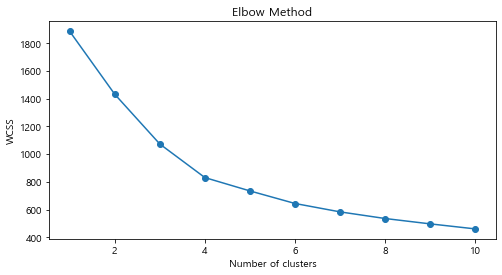

In [47]:
# 엘보우 방법을 통한 최적 군집 수 결정
wcss = []  # Within-Cluster Sum of Square

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [66]:
# K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=4, random_state=42)  # 4개의 클러스터로 설정
merged_data_3["cluster"] = kmeans.fit_predict(X_scaled)
merged_data_2["cluster"] = kmeans.fit_predict(X_scaled)

# 결과 출력
merged_data_3

,gid,nearest_subway_distance,nearest_bus_distance,nearest_fac_distance,cluster
0,다사731458,141.476686,8.545412,18.345543,2
1,다사731459,223.694282,78.108680,82.348774,3
2,다사725438,1965.456542,77.557607,137.777873,0
3,다사730463,600.234724,148.163747,142.990537,3
4,다사729463,608.514195,245.421247,138.809093,3
...,...,...,...,...,...
624,다사727444,1334.688208,252.970911,22.378973,2
625,다사728458,223.694259,301.459725,30.636455,2
626,다사742477,510.101745,182.798080,6.135122,2
627,다사727441,1628.518735,142.735994,20.822393,0


In [67]:
merged_data_2[merged_data_2['blockType']=='주차장']

,gid,grid_polygon,grid_centroid,zoneCode,zoneName,blockName,blockType,target_polygon,geometry,grid_center_lon,...,bus_cnt,sub_cnt,lot_cnt,nearest_subway_distance,nearest_bus_distance,target_centroid,target_center_lon,target_center_lat,nearest_fac_distance,cluster
390,다사738469,"POLYGON ((127.20350 37.52102, 127.20350 37.521...",POINT (127.20407 37.52148),41450MX2019001,하남교산 공공주택지구,P11,주차장,"POLYGON ((127.20413 37.52166, 127.20427 37.521...","POLYGON ((127.20350 37.52102, 127.20350 37.521...",127.204068,...,0.0,0.0,0.0,707.383754,102.002313,POINT (127.20403 37.52150),127.204034,37.521502,4.179619,2
538,다사740478,"POLYGON ((127.20574 37.52914, 127.20573 37.530...",POINT (127.20630 37.52959),41450MX2019001,하남교산 공공주택지구,P1,주차장,"POLYGON ((127.20591 37.52809, 127.20540 37.528...","POLYGON ((127.20574 37.52914, 127.20573 37.530...",127.206299,...,0.0,0.0,0.0,360.696380,403.656856,POINT (127.20614 37.52896),127.206137,37.528962,71.481097,1
599,다사725450,"POLYGON ((127.18886 37.50386, 127.18886 37.504...",POINT (127.18943 37.50431),41450MX2019001,하남교산 공공주택지구,P20,주차장,"POLYGON ((127.18970 37.50447, 127.18973 37.504...","POLYGON ((127.18886 37.50386, 127.18886 37.504...",127.189427,...,0.0,0.0,0.0,860.568912,239.587886,POINT (127.18932 37.50431),127.189324,37.504307,9.168091,2


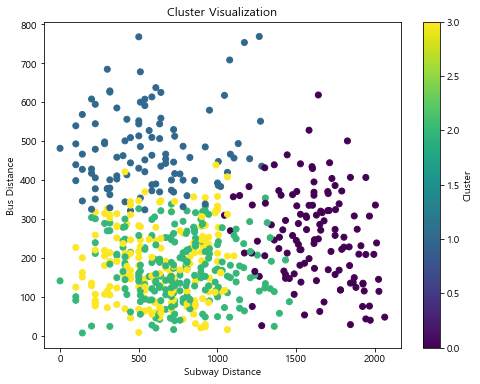

In [68]:
# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(
    merged_data_3["nearest_subway_distance"], 
    merged_data_3["nearest_bus_distance"], 
    c=merged_data_3["cluster"], 
    cmap="viridis"
)
plt.xlabel("Subway Distance")
plt.ylabel("Bus Distance")
plt.title("Cluster Visualization")
plt.colorbar(label="Cluster")
plt.show()


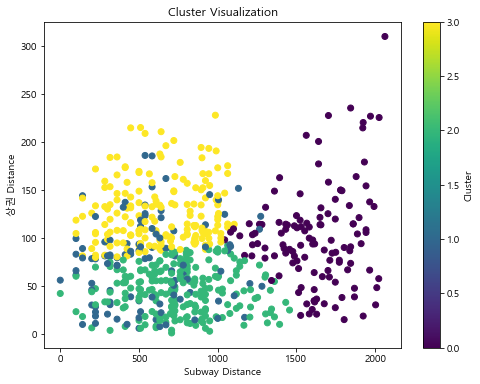

In [69]:
# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(
    merged_data_3["nearest_subway_distance"], 
    merged_data_3["nearest_fac_distance"], 
    c=merged_data_3["cluster"], 
    cmap="viridis"
)
plt.xlabel("Subway Distance")
plt.ylabel("상권 Distance")
plt.title("Cluster Visualization")
plt.colorbar(label="Cluster")
plt.show()


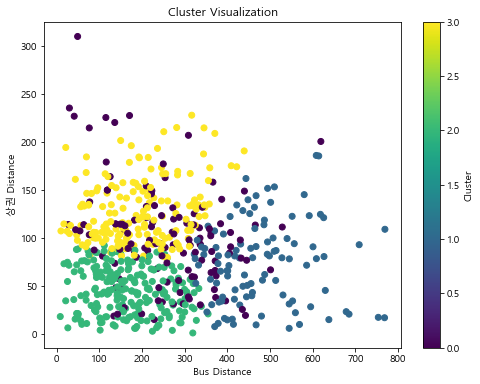

In [70]:
# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(
    merged_data_3["nearest_bus_distance"], 
    merged_data_3["nearest_fac_distance"], 
    c=merged_data_3["cluster"], 
    cmap="viridis"
)
plt.xlabel("Bus Distance")
plt.ylabel("상권 Distance")
plt.title("Cluster Visualization")
plt.colorbar(label="Cluster")
plt.show()


#### => 지하철, 버스 정류장으로부터 거리가 멀고, 상권과의 거리가 가까운 cluster 1 선택

In [71]:
target_grid = merged_data_2[merged_data_2['cluster']==1].reset_index()
target_grid

,index,gid,grid_polygon,grid_centroid,zoneCode,zoneName,blockName,blockType,target_polygon,geometry,...,bus_cnt,sub_cnt,lot_cnt,nearest_subway_distance,nearest_bus_distance,target_centroid,target_center_lon,target_center_lat,nearest_fac_distance,cluster
0,6,다사737475,"POLYGON ((127.20235 37.52643, 127.20235 37.527...",POINT (127.20291 37.52688),41450MX2019001,하남교산 공공주택지구,근4,공원,"POLYGON ((127.20426 37.52649, 127.20425 37.526...","POLYGON ((127.20235 37.52643, 127.20235 37.527...",...,0.0,0.0,0.0,100.039167,440.146793,POINT (127.20324 37.52631),127.203242,37.526306,61.652351,1
1,7,다사732450,"POLYGON ((127.19678 37.50388, 127.19678 37.504...",POINT (127.19735 37.50433),41450MX2019001,하남교산 공공주택지구,천7,하천,"POLYGON ((127.19884 37.50295, 127.19874 37.502...","POLYGON ((127.19678 37.50388, 127.19678 37.504...",...,0.0,0.0,0.0,728.295840,417.271102,POINT (127.19793 37.50377),127.197934,37.503767,81.456037,1
2,16,다사732477,"POLYGON ((127.19668 37.52822, 127.19668 37.529...",POINT (127.19725 37.52867),41450MX2019001,하남교산 공공주택지구,자족5-1,자족기능확보시설,"POLYGON ((127.20032 37.52980, 127.20010 37.529...","POLYGON ((127.19668 37.52822, 127.19668 37.529...",...,0.0,0.0,0.0,510.101580,354.791265,POINT (127.19862 37.52987),127.198616,37.529868,112.523778,1
3,17,다사733479,"POLYGON ((127.19781 37.53002, 127.19781 37.530...",POINT (127.19837 37.53047),41450MX2019001,하남교산 공공주택지구,자족5-1,자족기능확보시설,"POLYGON ((127.20032 37.52980, 127.20010 37.529...","POLYGON ((127.19781 37.53002, 127.19781 37.530...",...,0.0,0.0,0.0,500.195768,544.895314,POINT (127.19862 37.52987),127.198616,37.529868,6.095312,1
4,18,다사732478,"POLYGON ((127.19668 37.52912, 127.19668 37.530...",POINT (127.19725 37.52957),41450MX2019001,하남교산 공공주택지구,자족5-1,자족기능확보시설,"POLYGON ((127.20032 37.52980, 127.20010 37.529...","POLYGON ((127.19668 37.52912, 127.19668 37.530...",...,0.0,0.0,0.0,538.727312,452.581971,POINT (127.19862 37.52987),127.198616,37.529868,125.615930,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,585,다사734451,"POLYGON ((127.19904 37.50479, 127.19904 37.505...",POINT (127.19961 37.50524),41450MX2019001,하남교산 공공주택지구,경13,녹지,"POLYGON ((127.19970 37.50732, 127.19988 37.507...","POLYGON ((127.19904 37.50479, 127.19904 37.505...",...,0.0,0.0,0.0,721.392454,530.396719,POINT (127.20005 37.50535),127.200047,37.505348,40.819657,1
101,602,다사735476,"POLYGON ((127.20008 37.52732, 127.20008 37.528...",POINT (127.20065 37.52778),41450MX2019001,하남교산 공공주택지구,소3,공원,"POLYGON ((127.20185 37.52738, 127.20168 37.527...","POLYGON ((127.20008 37.52732, 127.20008 37.528...",...,0.0,0.0,0.0,200.078320,326.066649,POINT (127.20113 37.52749),127.201126,37.527488,52.990849,1
102,603,다사740484,"POLYGON ((127.20571 37.53455, 127.20571 37.535...",POINT (127.20628 37.53500),41450MX2019001,하남교산 공공주택지구,오1,오수중계펌프장,"POLYGON ((127.20645 37.53455, 127.20612 37.534...","POLYGON ((127.20571 37.53455, 127.20571 37.535...",...,0.0,0.0,0.0,854.735097,400.078157,POINT (127.20622 37.53488),127.206216,37.534877,14.865199,1
103,616,다사738478,"POLYGON ((127.20347 37.52914, 127.20347 37.530...",POINT (127.20404 37.52959),41450MX2019001,하남교산 공공주택지구,업무1,업무시설,"POLYGON ((127.20421 37.52958, 127.20421 37.529...","POLYGON ((127.20347 37.52914, 127.20347 37.530...",...,0.0,0.0,0.0,223.694384,595.247550,POINT (127.20377 37.52944),127.203774,37.529437,28.538802,1


In [72]:
target_grid.drop('index', axis=1)

,gid,grid_polygon,grid_centroid,zoneCode,zoneName,blockName,blockType,target_polygon,geometry,grid_center_lon,...,bus_cnt,sub_cnt,lot_cnt,nearest_subway_distance,nearest_bus_distance,target_centroid,target_center_lon,target_center_lat,nearest_fac_distance,cluster
0,다사737475,"POLYGON ((127.20235 37.52643, 127.20235 37.527...",POINT (127.20291 37.52688),41450MX2019001,하남교산 공공주택지구,근4,공원,"POLYGON ((127.20426 37.52649, 127.20425 37.526...","POLYGON ((127.20235 37.52643, 127.20235 37.527...",127.202915,...,0.0,0.0,0.0,100.039167,440.146793,POINT (127.20324 37.52631),127.203242,37.526306,61.652351,1
1,다사732450,"POLYGON ((127.19678 37.50388, 127.19678 37.504...",POINT (127.19735 37.50433),41450MX2019001,하남교산 공공주택지구,천7,하천,"POLYGON ((127.19884 37.50295, 127.19874 37.502...","POLYGON ((127.19678 37.50388, 127.19678 37.504...",127.197347,...,0.0,0.0,0.0,728.295840,417.271102,POINT (127.19793 37.50377),127.197934,37.503767,81.456037,1
2,다사732477,"POLYGON ((127.19668 37.52822, 127.19668 37.529...",POINT (127.19725 37.52867),41450MX2019001,하남교산 공공주택지구,자족5-1,자족기능확보시설,"POLYGON ((127.20032 37.52980, 127.20010 37.529...","POLYGON ((127.19668 37.52822, 127.19668 37.529...",127.197249,...,0.0,0.0,0.0,510.101580,354.791265,POINT (127.19862 37.52987),127.198616,37.529868,112.523778,1
3,다사733479,"POLYGON ((127.19781 37.53002, 127.19781 37.530...",POINT (127.19837 37.53047),41450MX2019001,하남교산 공공주택지구,자족5-1,자족기능확보시설,"POLYGON ((127.20032 37.52980, 127.20010 37.529...","POLYGON ((127.19781 37.53002, 127.19781 37.530...",127.198373,...,0.0,0.0,0.0,500.195768,544.895314,POINT (127.19862 37.52987),127.198616,37.529868,6.095312,1
4,다사732478,"POLYGON ((127.19668 37.52912, 127.19668 37.530...",POINT (127.19725 37.52957),41450MX2019001,하남교산 공공주택지구,자족5-1,자족기능확보시설,"POLYGON ((127.20032 37.52980, 127.20010 37.529...","POLYGON ((127.19668 37.52912, 127.19668 37.530...",127.197245,...,0.0,0.0,0.0,538.727312,452.581971,POINT (127.19862 37.52987),127.198616,37.529868,125.615930,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,다사734451,"POLYGON ((127.19904 37.50479, 127.19904 37.505...",POINT (127.19961 37.50524),41450MX2019001,하남교산 공공주택지구,경13,녹지,"POLYGON ((127.19970 37.50732, 127.19988 37.507...","POLYGON ((127.19904 37.50479, 127.19904 37.505...",127.199606,...,0.0,0.0,0.0,721.392454,530.396719,POINT (127.20005 37.50535),127.200047,37.505348,40.819657,1
101,다사735476,"POLYGON ((127.20008 37.52732, 127.20008 37.528...",POINT (127.20065 37.52778),41450MX2019001,하남교산 공공주택지구,소3,공원,"POLYGON ((127.20185 37.52738, 127.20168 37.527...","POLYGON ((127.20008 37.52732, 127.20008 37.528...",127.200648,...,0.0,0.0,0.0,200.078320,326.066649,POINT (127.20113 37.52749),127.201126,37.527488,52.990849,1
102,다사740484,"POLYGON ((127.20571 37.53455, 127.20571 37.535...",POINT (127.20628 37.53500),41450MX2019001,하남교산 공공주택지구,오1,오수중계펌프장,"POLYGON ((127.20645 37.53455, 127.20612 37.534...","POLYGON ((127.20571 37.53455, 127.20571 37.535...",127.206278,...,0.0,0.0,0.0,854.735097,400.078157,POINT (127.20622 37.53488),127.206216,37.534877,14.865199,1
103,다사738478,"POLYGON ((127.20347 37.52914, 127.20347 37.530...",POINT (127.20404 37.52959),41450MX2019001,하남교산 공공주택지구,업무1,업무시설,"POLYGON ((127.20421 37.52958, 127.20421 37.529...","POLYGON ((127.20347 37.52914, 127.20347 37.530...",127.204036,...,0.0,0.0,0.0,223.694384,595.247550,POINT (127.20377 37.52944),127.203774,37.529437,28.538802,1


In [99]:
# gid blockType이 주택과 관련된 행 제외
target_grid_1 = target_grid[target_grid['gid'].isin(df_apart_grid['gid'].unique())]
target_grid_1 = target_grid_1[target_grid_1['blockType'] != '주차장']

# 결과 확인
target_grid_1

,index,gid,grid_polygon,grid_centroid,zoneCode,zoneName,blockName,blockType,target_polygon,geometry,...,bus_cnt,sub_cnt,lot_cnt,nearest_subway_distance,nearest_bus_distance,target_centroid,target_center_lon,target_center_lat,nearest_fac_distance,cluster
0,6,다사737475,"POLYGON ((127.20235 37.52643, 127.20235 37.527...",POINT (127.20291 37.52688),41450MX2019001,하남교산 공공주택지구,근4,공원,"POLYGON ((127.20426 37.52649, 127.20425 37.526...","POLYGON ((127.20235 37.52643, 127.20235 37.527...",...,0.0,0.0,0.0,100.039167,440.146793,POINT (127.20324 37.52631),127.203242,37.526306,61.652351,1
1,7,다사732450,"POLYGON ((127.19678 37.50388, 127.19678 37.504...",POINT (127.19735 37.50433),41450MX2019001,하남교산 공공주택지구,천7,하천,"POLYGON ((127.19884 37.50295, 127.19874 37.502...","POLYGON ((127.19678 37.50388, 127.19678 37.504...",...,0.0,0.0,0.0,728.295840,417.271102,POINT (127.19793 37.50377),127.197934,37.503767,81.456037,1
2,16,다사732477,"POLYGON ((127.19668 37.52822, 127.19668 37.529...",POINT (127.19725 37.52867),41450MX2019001,하남교산 공공주택지구,자족5-1,자족기능확보시설,"POLYGON ((127.20032 37.52980, 127.20010 37.529...","POLYGON ((127.19668 37.52822, 127.19668 37.529...",...,0.0,0.0,0.0,510.101580,354.791265,POINT (127.19862 37.52987),127.198616,37.529868,112.523778,1
3,17,다사733479,"POLYGON ((127.19781 37.53002, 127.19781 37.530...",POINT (127.19837 37.53047),41450MX2019001,하남교산 공공주택지구,자족5-1,자족기능확보시설,"POLYGON ((127.20032 37.52980, 127.20010 37.529...","POLYGON ((127.19781 37.53002, 127.19781 37.530...",...,0.0,0.0,0.0,500.195768,544.895314,POINT (127.19862 37.52987),127.198616,37.529868,6.095312,1
4,18,다사732478,"POLYGON ((127.19668 37.52912, 127.19668 37.530...",POINT (127.19725 37.52957),41450MX2019001,하남교산 공공주택지구,자족5-1,자족기능확보시설,"POLYGON ((127.20032 37.52980, 127.20010 37.529...","POLYGON ((127.19668 37.52912, 127.19668 37.530...",...,0.0,0.0,0.0,538.727312,452.581971,POINT (127.19862 37.52987),127.198616,37.529868,125.615930,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,585,다사734451,"POLYGON ((127.19904 37.50479, 127.19904 37.505...",POINT (127.19961 37.50524),41450MX2019001,하남교산 공공주택지구,경13,녹지,"POLYGON ((127.19970 37.50732, 127.19988 37.507...","POLYGON ((127.19904 37.50479, 127.19904 37.505...",...,0.0,0.0,0.0,721.392454,530.396719,POINT (127.20005 37.50535),127.200047,37.505348,40.819657,1
101,602,다사735476,"POLYGON ((127.20008 37.52732, 127.20008 37.528...",POINT (127.20065 37.52778),41450MX2019001,하남교산 공공주택지구,소3,공원,"POLYGON ((127.20185 37.52738, 127.20168 37.527...","POLYGON ((127.20008 37.52732, 127.20008 37.528...",...,0.0,0.0,0.0,200.078320,326.066649,POINT (127.20113 37.52749),127.201126,37.527488,52.990849,1
102,603,다사740484,"POLYGON ((127.20571 37.53455, 127.20571 37.535...",POINT (127.20628 37.53500),41450MX2019001,하남교산 공공주택지구,오1,오수중계펌프장,"POLYGON ((127.20645 37.53455, 127.20612 37.534...","POLYGON ((127.20571 37.53455, 127.20571 37.535...",...,0.0,0.0,0.0,854.735097,400.078157,POINT (127.20622 37.53488),127.206216,37.534877,14.865199,1
103,616,다사738478,"POLYGON ((127.20347 37.52914, 127.20347 37.530...",POINT (127.20404 37.52959),41450MX2019001,하남교산 공공주택지구,업무1,업무시설,"POLYGON ((127.20421 37.52958, 127.20421 37.529...","POLYGON ((127.20347 37.52914, 127.20347 37.530...",...,0.0,0.0,0.0,223.694384,595.247550,POINT (127.20377 37.52944),127.203774,37.529437,28.538802,1


In [101]:
import folium
from folium.plugins import MarkerCluster

# 중심점 설정 (위도와 경도의 평균값 사용)
center_lat = target_grid_1['target_center_lat'].mean()
center_lon = target_grid_1['target_center_lon'].mean()

# 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# MarkerCluster 객체 생성
marker_cluster = MarkerCluster().add_to(m)

# 데이터 포인트를 MarkerCluster에 추가
for _, row in target_grid_1.iterrows():
    folium.Marker(
        location=[row['grid_center_lat'], row['grid_center_lon']],
        popup=f"격자 위치: {row['gid']}, 상업용도: {row['blockType']}"
    ).add_to(marker_cluster)

# 지도 출력
m

In [102]:
import folium
from folium.plugins import MarkerCluster

# 중심점 설정 (위도와 경도의 평균값 사용)
center_lat = target_grid_1['target_center_lat'].mean()
center_lon = target_grid_1['target_center_lon'].mean()

# 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# MarkerCluster 객체 생성
marker_cluster = MarkerCluster().add_to(m)

# 데이터 포인트를 MarkerCluster에 추가
for _, row in target_grid_1.iterrows():
    folium.Marker(
        location=[row['target_center_lat'], row['target_center_lon']],
        popup=f"격자 위치: {row['gid']}, 상업용도: {row['blockType']}"
    ).add_to(marker_cluster)

# 지도 출력
m

In [103]:
# 2. 위치 좌표 추출
coordinates = target_grid_1[["target_center_lon", "target_center_lat"]]

# 3. DBSCAN을 사용해 가까운 격자를 클러스터링
dbscan = DBSCAN(eps=0.001, min_samples=2)  # eps는 거리 임계값, 필요시 조정
target_grid_1["cluster"] = dbscan.fit_predict(coordinates)

# 4. 클러스터별 평균 좌표 계산
def compute_cluster_mean(cluster):
    cluster_data = target_grid_1[target_grid_1["cluster"] == cluster]
    mean_lon = cluster_data["target_center_lon"].mean()
    mean_lat = cluster_data["target_center_lat"].mean()
    return pd.Series({"mean_lon": mean_lon, "mean_lat": mean_lat})

cluster_means = (
    target_grid_1[target_grid_1["cluster"] != -1]["cluster"]
    .drop_duplicates()
    .apply(compute_cluster_mean)
    .reset_index(drop=True)
)

# 5. 클러스터 내 격자 평균 좌표로 대체
for cluster in target_grid_1["cluster"].unique():
    if cluster != -1:  # -1은 노이즈로 간주
        mean_coords = cluster_means.loc[cluster]
        target_grid_1.loc[target_grid_1["cluster"] == cluster, ["target_center_lon", "target_center_lat"]] = mean_coords

# 6. 중복 제거 및 결과 출력
target_grid_2 = target_grid_1.drop_duplicates(subset=["cluster"])
target_grid_2

,index,gid,grid_polygon,grid_centroid,zoneCode,zoneName,blockName,blockType,target_polygon,geometry,...,bus_cnt,sub_cnt,lot_cnt,nearest_subway_distance,nearest_bus_distance,target_centroid,target_center_lon,target_center_lat,nearest_fac_distance,cluster
0,6,다사737475,"POLYGON ((127.20235 37.52643, 127.20235 37.527...",POINT (127.20291 37.52688),41450MX2019001,하남교산 공공주택지구,근4,공원,"POLYGON ((127.20426 37.52649, 127.20425 37.526...","POLYGON ((127.20235 37.52643, 127.20235 37.527...",...,0.0,0.0,0.0,1.000392e+02,440.146793,POINT (127.20324 37.52631),NaN,NaN,61.652351,0
1,7,다사732450,"POLYGON ((127.19678 37.50388, 127.19678 37.504...",POINT (127.19735 37.50433),41450MX2019001,하남교산 공공주택지구,천7,하천,"POLYGON ((127.19884 37.50295, 127.19874 37.502...","POLYGON ((127.19678 37.50388, 127.19678 37.504...",...,0.0,0.0,0.0,7.282958e+02,417.271102,POINT (127.19793 37.50377),127.197934,37.503767,81.456037,-1
2,16,다사732477,"POLYGON ((127.19668 37.52822, 127.19668 37.529...",POINT (127.19725 37.52867),41450MX2019001,하남교산 공공주택지구,자족5-1,자족기능확보시설,"POLYGON ((127.20032 37.52980, 127.20010 37.529...","POLYGON ((127.19668 37.52822, 127.19668 37.529...",...,0.0,0.0,0.0,5.101016e+02,354.791265,POINT (127.19862 37.52987),NaN,NaN,112.523778,1
9,28,다사726458,"POLYGON ((127.18997 37.51107, 127.18996 37.511...",POINT (127.19053 37.51153),41450MX2019001,하남교산 공공주택지구,도,도로,"POLYGON ((127.18992 37.49266, 127.18990 37.492...","POLYGON ((127.18997 37.51107, 127.18996 37.511...",...,0.0,0.0,0.0,4.124718e+02,501.490588,POINT (127.19869 37.51567),NaN,NaN,137.371742,2
20,126,다사740482,"POLYGON ((127.20572 37.53275, 127.20572 37.533...",POINT (127.20629 37.53320),41450MX2019001,하남교산 공공주택지구,도,도로,"POLYGON ((127.20851 37.53579, 127.20878 37.535...","POLYGON ((127.20572 37.53275, 127.20572 37.533...",...,0.0,0.0,0.0,6.710832e+02,454.908579,POINT (127.21535 37.53357),NaN,NaN,89.460902,3
37,195,다사738479,"POLYGON ((127.20347 37.53004, 127.20346 37.530...",POINT (127.20403 37.53049),41450MX2019001,하남교산 공공주택지구,유수2,유수지,"POLYGON ((127.20351 37.53086, 127.20353 37.530...","POLYGON ((127.20347 37.53004, 127.20346 37.530...",...,0.0,0.0,0.0,3.163516e+02,626.530879,POINT (127.20312 37.53042),NaN,NaN,80.865957,4
39,215,다사738482,"POLYGON ((127.20346 37.53274, 127.20345 37.533...",POINT (127.20402 37.53319),41450MX2019001,하남교산 공공주택지구,종3,종교시설용지,"POLYGON ((127.20427 37.53298, 127.20423 37.532...","POLYGON ((127.20346 37.53274, 127.20345 37.533...",...,0.0,0.0,0.0,6.085145e+02,637.903282,POINT (127.20402 37.53306),NaN,NaN,15.153411,5
40,235,다사737476,"POLYGON ((127.20235 37.52733, 127.20234 37.528...",POINT (127.20291 37.52778),41450MX2019001,하남교산 공공주택지구,중복7,복합시설용지기타,"POLYGON ((127.20419 37.52759, 127.20424 37.526...","POLYGON ((127.20235 37.52733, 127.20234 37.528...",...,0.0,1.0,0.0,1.256135e-09,482.339605,POINT (127.20327 37.52736),NaN,NaN,56.251273,6
44,244,다사736479,"POLYGON ((127.20120 37.53003, 127.20120 37.530...",POINT (127.20177 37.53048),41450MX2019001,하남교산 공공주택지구,천1,하천,"POLYGON ((127.20204 37.53071, 127.20105 37.529...","POLYGON ((127.20120 37.53003, 127.20120 37.530...",...,0.0,0.0,0.0,3.163516e+02,629.554206,POINT (127.20138 37.53022),NaN,NaN,45.577795,7
46,252,다사722448,"POLYGON ((127.18548 37.50205, 127.18547 37.502...",POINT (127.18604 37.50250),41450MX2019001,하남교산 공공주택지구,근11,공원,"POLYGON ((127.18597 37.50316, 127.18626 37.502...","POLYGON ((127.18548 37.50205, 127.18547 37.502...",...,0.0,0.0,0.0,1.204630e+03,455.492878,POINT (127.18617 37.50204),NaN,NaN,52.720519,8


In [104]:
target_grid_1['grid_center_lon']

0      127.202915
1      127.197347
2      127.197249
3      127.198373
4      127.197245
          ...    
100    127.199606
101    127.200648
102    127.206278
103    127.204036
104    127.204089
Name: grid_center_lon, Length: 84, dtype: float64

In [108]:
import folium
from folium.plugins import MarkerCluster

# 중심점 설정 (위도와 경도의 평균값 사용)
center_lat = target_grid_2['target_center_lat'].mean()
center_lon = target_grid_2['target_center_lon'].mean()

# 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# MarkerCluster 객체 생성
marker_cluster = MarkerCluster().add_to(m)

# 데이터 포인트를 MarkerCluster에 추가
for _, row in target_grid_2.iterrows():
    folium.Marker(
        location=[row['grid_center_lat'], row['grid_center_lon']],
        popup=f"격자 위치: {row['gid']}, 상업용도: {row['blockType']}"
    ).add_to(marker_cluster)

# 지도 출력
m

In [109]:
target_grid_2

,index,gid,grid_polygon,grid_centroid,zoneCode,zoneName,blockName,blockType,target_polygon,geometry,...,bus_cnt,sub_cnt,lot_cnt,nearest_subway_distance,nearest_bus_distance,target_centroid,target_center_lon,target_center_lat,nearest_fac_distance,cluster
0,6,다사737475,"POLYGON ((127.20235 37.52643, 127.20235 37.527...",POINT (127.20291 37.52688),41450MX2019001,하남교산 공공주택지구,근4,공원,"POLYGON ((127.20426 37.52649, 127.20425 37.526...","POLYGON ((127.20235 37.52643, 127.20235 37.527...",...,0.0,0.0,0.0,1.000392e+02,440.146793,POINT (127.20324 37.52631),NaN,NaN,61.652351,0
1,7,다사732450,"POLYGON ((127.19678 37.50388, 127.19678 37.504...",POINT (127.19735 37.50433),41450MX2019001,하남교산 공공주택지구,천7,하천,"POLYGON ((127.19884 37.50295, 127.19874 37.502...","POLYGON ((127.19678 37.50388, 127.19678 37.504...",...,0.0,0.0,0.0,7.282958e+02,417.271102,POINT (127.19793 37.50377),127.197934,37.503767,81.456037,-1
2,16,다사732477,"POLYGON ((127.19668 37.52822, 127.19668 37.529...",POINT (127.19725 37.52867),41450MX2019001,하남교산 공공주택지구,자족5-1,자족기능확보시설,"POLYGON ((127.20032 37.52980, 127.20010 37.529...","POLYGON ((127.19668 37.52822, 127.19668 37.529...",...,0.0,0.0,0.0,5.101016e+02,354.791265,POINT (127.19862 37.52987),NaN,NaN,112.523778,1
9,28,다사726458,"POLYGON ((127.18997 37.51107, 127.18996 37.511...",POINT (127.19053 37.51153),41450MX2019001,하남교산 공공주택지구,도,도로,"POLYGON ((127.18992 37.49266, 127.18990 37.492...","POLYGON ((127.18997 37.51107, 127.18996 37.511...",...,0.0,0.0,0.0,4.124718e+02,501.490588,POINT (127.19869 37.51567),NaN,NaN,137.371742,2
20,126,다사740482,"POLYGON ((127.20572 37.53275, 127.20572 37.533...",POINT (127.20629 37.53320),41450MX2019001,하남교산 공공주택지구,도,도로,"POLYGON ((127.20851 37.53579, 127.20878 37.535...","POLYGON ((127.20572 37.53275, 127.20572 37.533...",...,0.0,0.0,0.0,6.710832e+02,454.908579,POINT (127.21535 37.53357),NaN,NaN,89.460902,3
37,195,다사738479,"POLYGON ((127.20347 37.53004, 127.20346 37.530...",POINT (127.20403 37.53049),41450MX2019001,하남교산 공공주택지구,유수2,유수지,"POLYGON ((127.20351 37.53086, 127.20353 37.530...","POLYGON ((127.20347 37.53004, 127.20346 37.530...",...,0.0,0.0,0.0,3.163516e+02,626.530879,POINT (127.20312 37.53042),NaN,NaN,80.865957,4
39,215,다사738482,"POLYGON ((127.20346 37.53274, 127.20345 37.533...",POINT (127.20402 37.53319),41450MX2019001,하남교산 공공주택지구,종3,종교시설용지,"POLYGON ((127.20427 37.53298, 127.20423 37.532...","POLYGON ((127.20346 37.53274, 127.20345 37.533...",...,0.0,0.0,0.0,6.085145e+02,637.903282,POINT (127.20402 37.53306),NaN,NaN,15.153411,5
40,235,다사737476,"POLYGON ((127.20235 37.52733, 127.20234 37.528...",POINT (127.20291 37.52778),41450MX2019001,하남교산 공공주택지구,중복7,복합시설용지기타,"POLYGON ((127.20419 37.52759, 127.20424 37.526...","POLYGON ((127.20235 37.52733, 127.20234 37.528...",...,0.0,1.0,0.0,1.256135e-09,482.339605,POINT (127.20327 37.52736),NaN,NaN,56.251273,6
44,244,다사736479,"POLYGON ((127.20120 37.53003, 127.20120 37.530...",POINT (127.20177 37.53048),41450MX2019001,하남교산 공공주택지구,천1,하천,"POLYGON ((127.20204 37.53071, 127.20105 37.529...","POLYGON ((127.20120 37.53003, 127.20120 37.530...",...,0.0,0.0,0.0,3.163516e+02,629.554206,POINT (127.20138 37.53022),NaN,NaN,45.577795,7
46,252,다사722448,"POLYGON ((127.18548 37.50205, 127.18547 37.502...",POINT (127.18604 37.50250),41450MX2019001,하남교산 공공주택지구,근11,공원,"POLYGON ((127.18597 37.50316, 127.18626 37.502...","POLYGON ((127.18548 37.50205, 127.18547 37.502...",...,0.0,0.0,0.0,1.204630e+03,455.492878,POINT (127.18617 37.50204),NaN,NaN,52.720519,8


#### 인접한 지역은 수동으로 하나의 위치만 남김

Text(0, 0.5, 'Latitude (위도)')

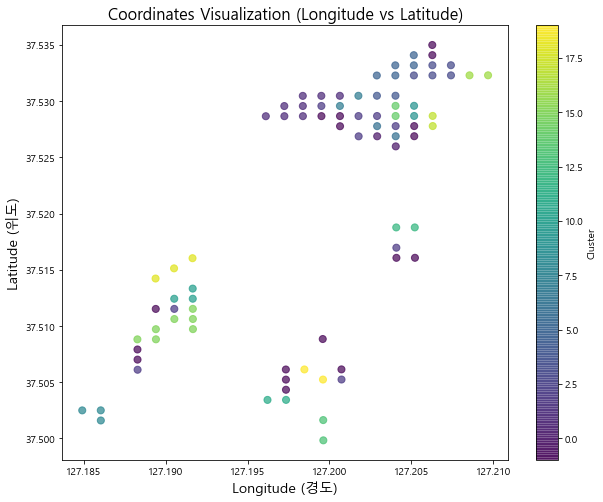

In [110]:
# 위경도 데이터 예시
longitude = target_grid_1["grid_center_lon"]  # 경도
latitude = target_grid_1["grid_center_lat"]   # 위도

# 클러스터 레이블 (색상 구분)
clusters = target_grid_1["cluster"]

# 플롯 그리기
plt.figure(figsize=(10, 8))  # 그래프 크기 설정
scatter = plt.scatter(longitude, latitude, c=clusters, cmap="viridis", s=50, alpha=0.7)

# 그래프에 색상 바 추가
plt.colorbar(scatter, label="Cluster")

# 제목 및 축 라벨 추가
plt.title("Coordinates Visualization (Longitude vs Latitude)", fontsize=16)
plt.xlabel("Longitude (경도)", fontsize=14)
plt.ylabel("Latitude (위도)", fontsize=14)

Text(0, 0.5, 'Latitude (위도)')

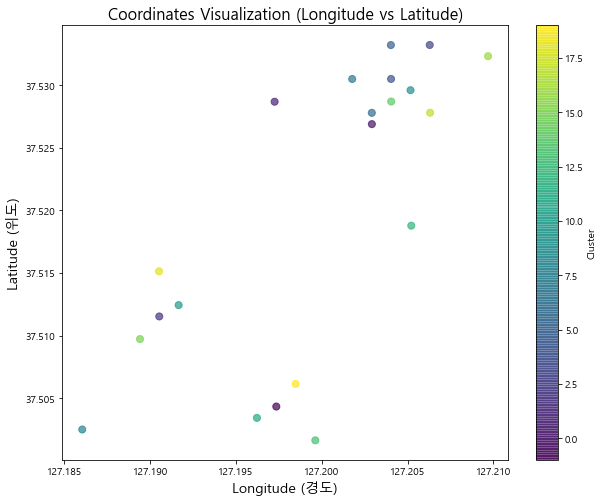

In [112]:
# 위경도 데이터 예시
longitude = target_grid_2["grid_center_lon"]  # 경도
latitude = target_grid_2["grid_center_lat"]   # 위도

# 클러스터 레이블 (색상 구분)
clusters = target_grid_2["cluster"]

# 플롯 그리기
plt.figure(figsize=(10, 8))  # 그래프 크기 설정
scatter = plt.scatter(longitude, latitude, c=clusters, cmap="viridis", s=50, alpha=0.7)

# 그래프에 색상 바 추가
plt.colorbar(scatter, label="Cluster")

# 제목 및 축 라벨 추가
plt.title("Coordinates Visualization (Longitude vs Latitude)", fontsize=16)
plt.xlabel("Longitude (경도)", fontsize=14)
plt.ylabel("Latitude (위도)", fontsize=14)

In [118]:
target_grid_2[['gid', 'nearest_subway_distance', 'nearest_bus_distance', 'nearest_fac_distance']].reset_index().to_csv('../data/하남시_교산지구_주차장_입지선정_3차.csv', index=False)